### Imports

In [2]:
import pandas as pd 
import numpy as np  

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.
C:\Users\Marija\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Marija\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Marija\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Marija\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

### Functions

In [47]:
def feature_sel(model,n_features,x_data,x_test,y_data):
    
    #Initializing RFE model
    rfe = RFE(model, n_features)

    #Transforming data using RFE
    X_train_rfe = rfe.fit_transform(x_data,y_data)  
    X_test_rfe = rfe.transform(X_test_tf)

    #Fitting the data to model
    fs=pd.DataFrame({'Feature':list(X.columns),
                        'Scores':rfe.ranking_})
    fs.sort_values(by='Scores',ascending=True)
    
    print(fs)
        
#     print(rfe.support_)
#     print(rfe.ranking_)
    
    return X_train_rfe, X_test_rfe,rfe.n_features_

def rmse(model,X_train_tf,X_test_tf,y_train,y_test):
    rmse_all=[]
    features={}
    vect=np.arange(1,27,2)

    for i in vect:
        X_train_rfe,X_test_rfe,fn=feature_sel(model,i,X_train_tf,X_test_tf,y_train)
        ind="'"+str(i)+"'"
        features[ind]=fn
        rmse=model_eval(model,X_train_rfe,X_test_rfe,y_train,y_test)
        rmse_all.append(rmse)
        
    return rmse_all,features


def find_best_model(n_models,rmsa):
    lowest=rmsa[0]
    idx=0
    for i in range(n_models):
        if rmsa[i]<lowest:
            lowest=rmsa[i]
            idx=i
            
    return lowest,idx

def grid_search(model,params,X_data,y_data):
    gs=GridSearchCV(model,param_grid=params,cv=3,verbose=1,return_train_score=True).fit(X_data, y_data)
    
    return gs.best_params_,gs.best_score_
    
def model_eval(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    # # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))



### Data loading/Data cleaning

In [4]:
df = pd.read_csv('all.csv',encoding = "utf-8",names =['alpha','PIR', 'ptt', 'bpmax' ,'bpmin', 'hrfinal', 'ih', 'il', 'meu', 'j', 'k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','aa','ab','ac'] ,lineterminator='\n')

df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df=df.replace(np.nan,0)

In [5]:
df.shape

(9530, 29)

In [6]:
df.head()

,alpha,PIR,ptt,bpmax,bpmin,hrfinal,ih,il,meu,j,...,t,u,v,w,x,y,z,aa,ab,ac
0,681.60,1.4915,0.9900,122.57,58.825,123.25,2.8770,1.9289,1.04630,0.240,...,0.104,1.600000,0.0,0.040,0.0,0.0,0.040,0.0,0.6192,-0.1232
1,667.21,1.4743,0.8480,122.86,63.231,117.33,2.8759,1.9507,1.06310,0.216,...,0.080,1.500000,0.0,0.032,0.0,0.0,0.032,0.0,0.6416,-0.1248
2,704.14,1.4254,0.4016,106.79,57.571,112.93,2.7965,1.9619,0.92924,0.144,...,0.064,1.666700,0.0,0.024,0.0,0.0,0.024,0.0,0.6560,-0.1264
3,643.86,1.5054,0.8416,128.85,59.674,116.42,2.9257,1.9435,1.12440,0.256,...,0.120,1.500000,0.0,0.048,0.0,0.0,0.048,0.0,0.6384,-0.1264
4,994.94,1.0518,1.0240,107.24,66.874,132.15,2.7911,2.6536,0.99644,0.272,...,-0.264,-0.083333,0.0,-0.288,0.0,0.0,-0.288,0.0,0.1344,0.3280


### Splitting the dataset

In [7]:
X=df
X=X.drop('bpmax',axis=1)
X=X.drop('bpmin',axis=1)
y_bpmax = df['bpmax']
y_bpmin=df['bpmin']

In [8]:
X_my_seven=df[['alpha','PIR', 'ptt', 'hrfinal', 'ih', 'il', 'meu']]
X_my_seventeen=df[['alpha','PIR', 'ptt','hrfinal', 'ih', 'il', 'meu','j', 'k','l','m','n','o','p','q','r','s']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bpmax, test_size = 0.2, random_state = 0)

In [10]:
X_train_bpmin, X_test_bpmin, y_train_bpmin, y_test_bpmin = train_test_split(X,y_bpmin, test_size = 0.2, random_state = 0)

In [11]:
X_train_seven, X_test_seven, y_train_seven, y_test_seven = train_test_split(X_my_seven,y_bpmax, test_size = 0.2, random_state = 0)
X_train_seventeen, X_test_seventeen, y_train_seventeen, y_test_seventeen = train_test_split(X_my_seventeen,y_bpmax, test_size = 0.2, random_state = 0)

In [12]:
X_train_seven_bpmin, X_test_seven_bpmin, y_train_seven_bpmin, y_test_seven_bpmin = train_test_split(X_my_seven,y_bpmin, test_size = 0.2, random_state = 0)
X_train_seventeen_bpmin, X_test_seventeen_bpmin, y_train_seventeen_bpmin, y_test_seventeen_bpmin = train_test_split(X_my_seventeen,y_bpmin, test_size = 0.2, random_state = 0)

### Scaling the data

In [13]:
sc_X=StandardScaler()
X_train_tf=sc_X.fit_transform(X_train)
X_test_tf=sc_X.transform(X_test)

X_train_bpmin_tf=sc_X.fit_transform(X_train_bpmin)
X_test_bpmin_tf=sc_X.transform(X_test_bpmin)

X_train_seven_tf=sc_X.fit_transform(X_train_seven)
X_test_seven_tf=sc_X.transform(X_test_seven)

X_train_seventeen_tf=sc_X.fit_transform(X_train_seventeen)
X_test_seventeen_tf=sc_X.transform(X_test_seventeen)

X_train_seven_bpmin_tf=sc_X.fit_transform(X_train_seven_bpmin)
X_test_seven_bpmin_tf=sc_X.transform(X_test_seven_bpmin)

X_train_seventeen_bpmin_tf=sc_X.fit_transform(X_train_seventeen_bpmin)
X_test_seventeen_bpmin_tf=sc_X.transform(X_test_seventeen_bpmin)

### Fetature selection and model evaluation

### 1) Linear Regression Model

In [14]:
model1=LinearRegression()

In [15]:
rmse_lr,features_lr=rmse(model1,X_train_tf,X_test_tf,y_train,y_test)

    Feature  Scores
0     alpha      27
1       PIR      26
2       ptt      24
3   hrfinal      23
4        ih      14
5        il      15
6       meu      16
7         j       1
8         k       3
9         l      18
10        m       4
11        n       2
12        o      17
13        p       7
14        q       6
15        r      13
16        s      11
17        t      10
18        u      12
19        v      22
20        w      19
21        x      21
22        y      20
23        z       5
24       aa      25
25       ab       8
26       ac       9
Mean Absolute Error: 16.157080342016027
Mean Squared Error: 413.9546003155384
Root Mean Squared Error: 20.345874282407685
Variance score: 0.01
    Feature  Scores
0     alpha      25
1       PIR      24
2       ptt      22
3   hrfinal      21
4        ih      12
5        il      13
6       meu      14
7         j       1
8         k       1
9         l      16
10        m       2
11        n       1
12        o      15
13        p      

In [16]:
rmse_bpmin_lr,features_bpmin_lr=rmse(model1,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)

    Feature  Scores
0     alpha      26
1       PIR       5
2       ptt      25
3   hrfinal      22
4        ih       6
5        il       7
6       meu      12
7         j       1
8         k       2
9         l       9
10        m       4
11        n       3
12        o       8
13        p      14
14        q      13
15        r      24
16        s      16
17        t      15
18        u      21
19        v      19
20        w      17
21        x      23
22        y      20
23        z      18
24       aa      27
25       ab      10
26       ac      11
Mean Absolute Error: 14.986602500548265
Mean Squared Error: 368.0502640827777
Root Mean Squared Error: 19.18463614673934
Variance score: 0.00
    Feature  Scores
0     alpha      24
1       PIR       3
2       ptt      23
3   hrfinal      20
4        ih       4
5        il       5
6       meu      10
7         j       1
8         k       1
9         l       7
10        m       2
11        n       1
12        o       6
13        p      1

In [17]:
rmse_lr

[20.345874282407685,
 20.342620634322955,
 20.30884886493008,
 20.3174849452611,
 20.00320030059244,
 20.002208353291632,
 19.949111704682608,
 19.862702692477953,
 19.82981029263976,
 19.823545006943053,
 19.827385867604672,
 19.825447766766878,
 19.82221315706875]

In [18]:
rmse_bpmin_lr

[19.18463614673934,
 19.201928904161402,
 19.00093764663474,
 18.902716801559606,
 18.884619976703036,
 18.794713672358696,
 18.75210298509924,
 18.750120059820993,
 18.742340139212498,
 18.746521226174888,
 18.733665936934408,
 18.725331439549702,
 18.7290330634285]

In [23]:
best_lr,idx_lr=find_best_model(len(rmse_lr),rmse_lr)

In [19]:
best_bpmin_lr,idx_bpmin_lr=find_best_model(len(rmse_bpmin_lr),rmse_bpmin_lr)

In [20]:
len(rmse_lr)

13

In [21]:
len(rmse_bpmin_lr)

13

In [24]:
best_lr

19.82221315706875

In [25]:
best_bpmin_lr

18.725331439549702

In [17]:
idx_lr

12

In [26]:
idx_bpmin_lr

11

In [28]:
#Broj na features so koj e dobien najdobar score

ind=idx_lr*2+1
ind="'"+str(ind)+"'"
print(features_lr[ind])

25


In [27]:
#Broj na features so koj e dobien najdobar score

ind=idx_bpmin_lr*2+1
ind="'"+str(ind)+"'"
print(features_bpmin_lr[ind])

23


In [29]:
rmse_seven_lr=model_eval(model1,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)

Mean Absolute Error: 16.09102741174584
Mean Squared Error: 410.0448658090304
Root Mean Squared Error: 20.249564583196115
Variance score: 0.02


In [30]:
rmse_seventeen_lr=model_eval(model1,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

Mean Absolute Error: 15.965431988317746
Mean Squared Error: 407.4929553128877
Root Mean Squared Error: 20.186454748491318
Variance score: 0.03


In [31]:
rmse_seven_bpmin_lr=model_eval(model1,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)

Mean Absolute Error: 14.9632526385697
Mean Squared Error: 358.1480128436764
Root Mean Squared Error: 18.924798885157973
Variance score: 0.03


In [32]:
rmse_seventeen_bpmin_lr=model_eval(model1,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

Mean Absolute Error: 14.91957774498436
Mean Squared Error: 356.25190776746393
Root Mean Squared Error: 18.87463662610393
Variance score: 0.03


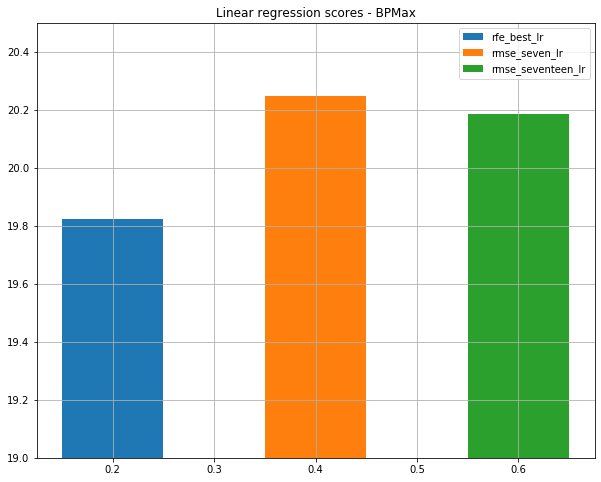

In [34]:
plt.figure(figsize=(10,8))
plt.title('Linear regression scores - BPMax')
plt.bar(0.2,best_lr,width=0.1)
plt.bar(0.4,rmse_seven_lr,width=0.1)
plt.bar(0.6,rmse_seventeen_lr,width=0.1)
plt.legend(['rfe_best_lr','rmse_seven_lr','rmse_seventeen_lr'])
plt.ylim(19,20.5)
plt.grid()

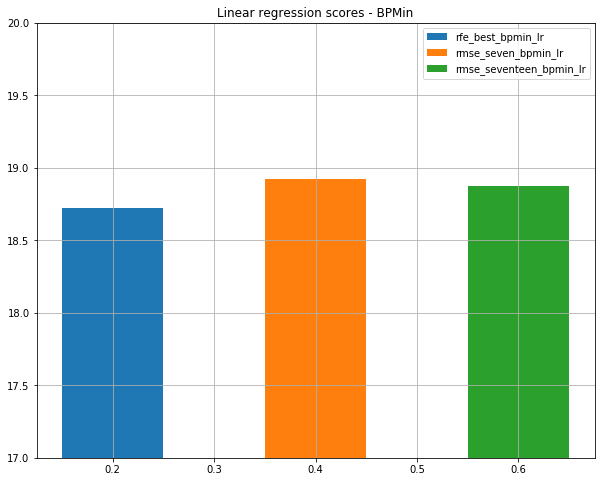

In [41]:
plt.figure(figsize=(10,8))
plt.title('Linear regression scores - BPMin')
plt.bar(0.2,best_bpmin_lr,width=0.1)
plt.bar(0.4,rmse_seven_bpmin_lr,width=0.1)
plt.bar(0.6,rmse_seventeen_bpmin_lr,width=0.1)
plt.legend(['rfe_best_bpmin_lr','rmse_seven_bpmin_lr','rmse_seventeen_bpmin_lr'])
plt.ylim(17,20)
plt.grid()

### 2) Ridge Regression

In [42]:
model2=Ridge()

In [48]:
params={'alpha': np.arange(0, 200, 1)}
bp_ridge,score_ridge=grid_search(model2,params,X_train_tf,y_train)
bp_ridge_seven,score_ridge_seven=grid_search(model2,params,X_train_seven_tf,y_train)
bp_ridge_seventeen,score_ridge_seventeen=grid_search(model2,params,X_train_seventeen_tf,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.7s finished


In [49]:
bp_ridge_bpmin,score_ridge_bpmin=grid_search(model2,params,X_train_bpmin_tf,y_train_bpmin)
bp_ridge_seven_bpmin,score_ridge_seven_bpmin=grid_search(model2,params,X_train_seven_bpmin_tf,y_train_bpmin)
bp_ridge_seventeen_bpmin,score_ridge_seventeen_bpmin=grid_search(model2,params,X_train_seventeen_bpmin_tf,y_train_bpmin)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.6s finished


In [50]:
print(bp_ridge)
print(bp_ridge_seven)
print(bp_ridge_seventeen)

{'alpha': 1}
{'alpha': 104}
{'alpha': 1}


In [51]:
print(bp_ridge_bpmin)
print(bp_ridge_seven_bpmin)
print(bp_ridge_seventeen_bpmin)

{'alpha': 2}
{'alpha': 93}
{'alpha': 0}


In [92]:
model2_gs=Ridge(alpha=1)
model2_seven_gs=Ridge(alpha=104)
rmse_ridge_gs,features_ridge_gs=rmse(model2_gs,X_train_tf,X_test_tf,y_train,y_test)
rmse_seven_ridge_gs=model_eval(model2_seven_gs,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)
rmse_seventeen_ridge_gs=model_eval(model2_gs,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

    Feature  Scores
0     alpha      27
1       PIR      26
2       ptt      24
3   hrfinal      23
4        ih      14
5        il      15
6       meu      16
7         j       1
8         k       3
9         l      18
10        m       4
11        n       2
12        o      17
13        p       7
14        q       6
15        r      13
16        s      11
17        t      10
18        u      12
19        v      22
20        w      19
21        x      21
22        y      20
23        z       5
24       aa      25
25       ab       8
26       ac       9
Mean Absolute Error: 16.15708740574748
Mean Squared Error: 413.9542690638763
Root Mean Squared Error: 20.345866141894188
Variance score: 0.01
    Feature  Scores
0     alpha      25
1       PIR      24
2       ptt      22
3   hrfinal      21
4        ih      12
5        il      13
6       meu      14
7         j       1
8         k       1
9         l      16
10        m       2
11        n       1
12        o      15
13        p       

In [63]:
model2_bpmin_gs=Ridge(alpha=2)
model2_seven_bpmin_gs=Ridge(alpha=93)
model2_seventeen_bpmin_gs=Ridge(alpha=0)
rmse_ridge_bpmin_gs,features_ridge_bpmin_gs=rmse(model2_bpmin_gs,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)
rmse_seven_ridge_bpmin_gs=model_eval(model2_seven_bpmin_gs,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)
rmse_seventeen_ridge_bpmin_gs=model_eval(model2_seventeen_bpmin_gs,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

    Feature  Scores
0     alpha      26
1       PIR       5
2       ptt      23
3   hrfinal      16
4        ih       6
5        il       7
6       meu      12
7         j       1
8         k       2
9         l      15
10        m       4
11        n       3
12        o      14
13        p       9
14        q       8
15        r      21
16        s      19
17        t      24
18        u      18
19        v      22
20        w      11
21        x      20
22        y      27
23        z      17
24       aa      25
25       ab      10
26       ac      13
Mean Absolute Error: 14.986601003805605
Mean Squared Error: 368.0503251408827
Root Mean Squared Error: 19.184637738067476
Variance score: 0.00
    Feature  Scores
0     alpha      24
1       PIR       3
2       ptt      21
3   hrfinal      14
4        ih       4
5        il       5
6       meu      10
7         j       1
8         k       1
9         l      13
10        m       2
11        n       1
12        o      12
13        p      

In [27]:
print(rmse_seven_ridge_gs)
print(rmse_seventeen_ridge_gs)

20.24981839997125
20.1829463567915


In [57]:
print(rmse_seven_ridge_bpmin_gs)
print(rmse_seventeen_ridge_bpmin_gs)

18.94549437985099
18.874636626103925


In [58]:
best_ridge_gs,idx_ridge_gs=find_best_model(len(rmse_ridge_gs),rmse_ridge_gs)

best_ridge_bpmin_gs,idx_ridge_bpmin_gs=find_best_model(len(rmse_ridge_bpmin_gs),rmse_ridge_bpmin_gs)

In [59]:
best_ridge_gs

19.82472686201692

In [60]:
best_ridge_bpmin_gs

18.731751949374818

In [61]:
#Broj na features so koj e dobien najdobar score

ind=idx_ridge_gs*2+1
ind="'"+str(ind)+"'"
print(features_ridge_gs[ind])

25


In [64]:
#Broj na features so koj e dobien najdobar score

ind=idx_ridge_bpmin_gs*2+1
ind="'"+str(ind)+"'"
print(features_ridge_bpmin_gs[ind])

23


In [65]:
rmse_ridge,features_ridge=rmse(model2,X_train_tf,X_test_tf,y_train,y_test)

    Feature  Scores
0     alpha      27
1       PIR      26
2       ptt      24
3   hrfinal      23
4        ih      14
5        il      15
6       meu      16
7         j       1
8         k       3
9         l      18
10        m       4
11        n       2
12        o      17
13        p       7
14        q       6
15        r      13
16        s      11
17        t      10
18        u      12
19        v      22
20        w      19
21        x      21
22        y      20
23        z       5
24       aa      25
25       ab       8
26       ac       9
Mean Absolute Error: 16.15708740574748
Mean Squared Error: 413.9542690638763
Root Mean Squared Error: 20.345866141894188
Variance score: 0.01
    Feature  Scores
0     alpha      25
1       PIR      24
2       ptt      22
3   hrfinal      21
4        ih      12
5        il      13
6       meu      14
7         j       1
8         k       1
9         l      16
10        m       2
11        n       1
12        o      15
13        p       

In [71]:
rmse_ridge_bpmin,features_ridge_bpmin=rmse(model2,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)

    Feature  Scores
0     alpha      25
1       PIR       6
2       ptt      23
3   hrfinal      19
4        ih       7
5        il       8
6       meu      12
7         j       1
8         k       2
9         l      15
10        m       4
11        n       3
12        o      14
13        p      10
14        q       9
15        r      22
16        s      17
17        t      16
18        u      18
19        v      21
20        w       5
21        x      20
22        y      27
23        z      26
24       aa      24
25       ab      11
26       ac      13
Mean Absolute Error: 14.98660175207879
Mean Squared Error: 368.05029460903455
Root Mean Squared Error: 19.184636942330563
Variance score: 0.00
    Feature  Scores
0     alpha      23
1       PIR       4
2       ptt      21
3   hrfinal      17
4        ih       5
5        il       6
6       meu      10
7         j       1
8         k       1
9         l      13
10        m       2
11        n       1
12        o      12
13        p      

In [72]:
rmse_ridge

[20.345866141894188,
 20.34255144419742,
 20.30583535393782,
 20.3124566779137,
 19.99865770405252,
 19.998760810336062,
 19.95054516518034,
 19.86615389756992,
 19.83308726077141,
 19.826780984735528,
 19.829664688305222,
 19.82874378573871,
 19.82472686201692]

In [73]:
rmse_ridge_bpmin

[19.184636942330563,
 19.20190572925852,
 19.173163441557705,
 18.904626371078187,
 18.873682531866518,
 18.818767364638017,
 18.751478805675298,
 18.739194860187457,
 18.742161228651472,
 18.73573816648489,
 18.72536701297272,
 18.72852537225581,
 18.734914297867366]

In [74]:
best_ridge,idx_ridge=find_best_model(len(rmse_ridge),rmse_ridge)

In [75]:
best_ridge_bpmin,idx_ridge_bpmin=find_best_model(len(rmse_ridge_bpmin),rmse_ridge_bpmin)

In [76]:
best_ridge

19.82472686201692

In [77]:
best_ridge_bpmin

18.72536701297272

In [79]:
#Broj na features so koj e dobien najdobar score

ind=idx_ridge*2+1
ind="'"+str(ind)+"'"
print(features_ridge[ind])

25


In [78]:
#Broj na features so koj e dobien najdobar score

ind=idx_ridge_bpmin*2+1
ind="'"+str(ind)+"'"
print(features_ridge_bpmin[ind])

21


In [80]:
rmse_seven_ridge=model_eval(model2,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)

Mean Absolute Error: 16.091175947478458
Mean Squared Error: 410.0551452318142
Root Mean Squared Error: 20.24981839997125
Variance score: 0.02


In [81]:
rmse_seventeen_ridge=model_eval(model2,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

Mean Absolute Error: 15.962275511796001
Mean Squared Error: 407.35132364112326
Root Mean Squared Error: 20.1829463567915
Variance score: 0.03


In [82]:
rmse_seven_ridge_bpmin=model_eval(model2,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)

Mean Absolute Error: 14.96349571532926
Mean Squared Error: 358.15930124045815
Root Mean Squared Error: 18.92509712631505
Variance score: 0.03


In [83]:
rmse_seventeen_ridge_bpmin=model_eval(model2,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

Mean Absolute Error: 14.917805445945687
Mean Squared Error: 356.233505606375
Root Mean Squared Error: 18.874149135957758
Variance score: 0.03


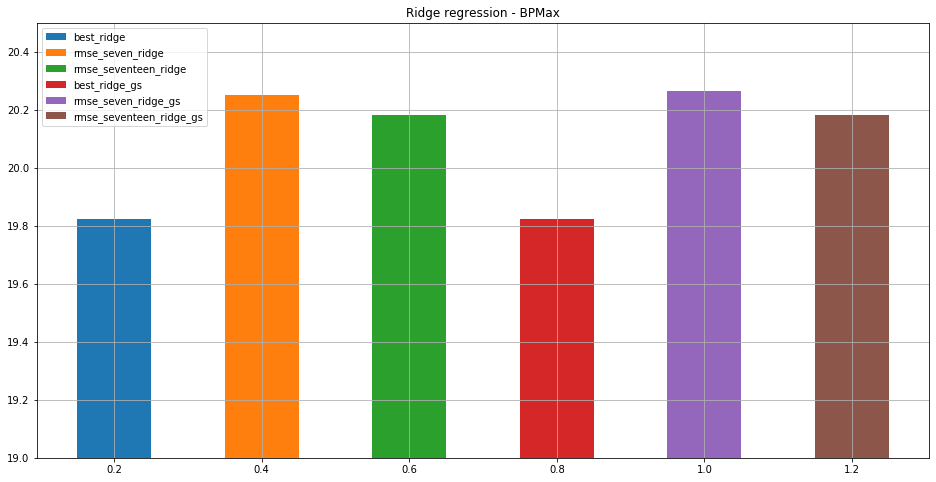

In [95]:
plt.figure(figsize=(16,8))
plt.title('Ridge regression - BPMax')
plt.bar(0.2,best_ridge,width=0.1)
plt.bar(0.4,rmse_seven_ridge,width=0.1)
plt.bar(0.6,rmse_seventeen_ridge,width=0.1)
plt.bar(0.8,best_ridge_gs,width=0.1)
plt.bar(1.0,rmse_seven_ridge_gs,width=0.1)
plt.bar(1.2,rmse_seventeen_ridge_gs,width=0.1)
plt.legend(['best_ridge','rmse_seven_ridge','rmse_seventeen_ridge','best_ridge_gs','rmse_seven_ridge_gs','rmse_seventeen_ridge_gs'])
plt.ylim(19,20.5)
plt.grid()

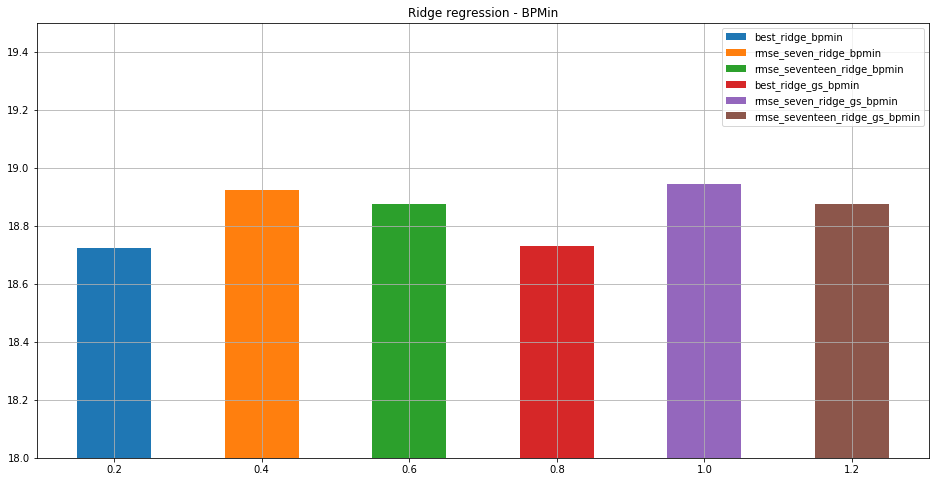

In [101]:
plt.figure(figsize=(16,8))
plt.title('Ridge regression - BPMin')
plt.bar(0.2,best_ridge_bpmin,width=0.1)
plt.bar(0.4,rmse_seven_ridge_bpmin,width=0.1)
plt.bar(0.6,rmse_seventeen_ridge_bpmin,width=0.1)
plt.bar(0.8,best_ridge_bpmin_gs,width=0.1)
plt.bar(1.0,rmse_seven_ridge_bpmin_gs,width=0.1)
plt.bar(1.2,rmse_seventeen_ridge_bpmin_gs,width=0.1)
plt.legend(['best_ridge_bpmin','rmse_seven_ridge_bpmin','rmse_seventeen_ridge_bpmin','best_ridge_gs_bpmin','rmse_seven_ridge_gs_bpmin','rmse_seventeen_ridge_gs_bpmin'])
plt.ylim(18,19.5)
plt.grid()

### 3) Random Forest Regression

In [48]:
model3=RandomForestRegressor()

In [49]:
rmse_rf,features_rf=rmse(model3,X_train_tf,X_test_tf,y_train,y_test)

C:\Users\mjv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mjv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mjv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mjv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mjv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

    Feature  Scores
0     alpha       9
1       PIR      11
2       ptt       6
3   hrfinal       2
4        ih       1
5        il       3
6       meu       4
7         j       7
8         k      14
9         l      13
10        m      15
11        n      22
12        o      18
13        p      19
14        q      20
15        r      10
16        s      21
17        t      12
18        u      16
19        v      25
20        w      23
21        x      24
22        y      26
23        z      17
24       aa      27
25       ab       5
26       ac       8
Mean Absolute Error: 19.19591291170777
Mean Squared Error: 598.9712485147913
Root Mean Squared Error: 24.473889117073146
Variance score: -0.43
    Feature  Scores
0     alpha       3
1       PIR       8
2       ptt       4
3   hrfinal       1
4        ih       1
5        il       1
6       meu       7
7         j       5
8         k      13
9         l      11
10        m      12
11        n      18
12        o      14
13        p      

Mean Absolute Error: 15.159221988457503
Mean Squared Error: 382.59305026683273
Root Mean Squared Error: 19.559985947511127
Variance score: 0.09
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       1
20        w       1
21        x       1
22        y       2
23        z       1
24       aa       3
25       ab       1
26       ac       1
Mean Absolute Error: 15.082120719657222
Mean Squared Error: 379.39043422531483
Root Mean Squared Error: 19.47794738224012
Variance score: 0.09


In [50]:
best_rf,idx_rf=find_best_model(len(rmse_rf),rmse_rf)

In [51]:
best_rf

19.46316156359289

In [52]:
rmse_seven_rf=model_eval(model3,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)

Mean Absolute Error: 15.59444575026233
Mean Squared Error: 404.36415789057446
Root Mean Squared Error: 20.108807967917304
Variance score: 0.03


In [53]:
rmse_seventeen_rf=model_eval(model3,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

Mean Absolute Error: 15.358739717933343
Mean Squared Error: 384.90380213065845
Root Mean Squared Error: 19.618965368506526
Variance score: 0.08


In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
params_rf = {'n_estimators': [100,200,300,500,1000],
#                'max_features': max_features,
               'max_depth': [80,90,100,110],
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap
            }

In [63]:
bp_rf,score_rf=grid_search(model3,params_rf,X_train_tf,y_train)
bp_rf_seven,score_rf_seven=grid_search(model3,params_rf,X_train_seven_tf,y_train)
bp_rf_seventeen,score_rf_seventeen=grid_search(model3,params_rf,X_train_seventeen_tf,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 38.7min finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 17.8min finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 29.1min finished


In [64]:
print(bp_rf)
print(bp_rf_seven)
print(bp_rf_seventeen)

{'max_depth': 100, 'n_estimators': 1000}
{'max_depth': 100, 'n_estimators': 1000}
{'max_depth': 100, 'n_estimators': 200}


In [65]:
model3_gs=RandomForestRegressor(n_estimators=1000,max_depth=100)
model3_seventeen_gs=RandomForestRegressor(n_estimators=200,max_depth=100)
rmse_rf_gs,features_rf_gs=rmse(model3_gs,X_train_tf,X_test_tf,y_train,y_test)
rmse_seven_rf_gs=model_eval(model3_gs,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)
rmse_seventeen_rf_gs=model_eval(model3_seventeen_gs,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

    Feature  Scores
0     alpha       9
1       PIR      10
2       ptt       6
3   hrfinal       2
4        ih       1
5        il       3
6       meu       4
7         j       7
8         k      14
9         l      13
10        m      20
11        n      16
12        o      18
13        p      15
14        q      21
15        r      11
16        s      22
17        t      12
18        u      17
19        v      25
20        w      23
21        x      24
22        y      27
23        z      19
24       aa      26
25       ab       5
26       ac       8
Mean Absolute Error: 18.878626938156785
Mean Squared Error: 579.5847277746149
Root Mean Squared Error: 24.074565993483972
Variance score: -0.39
    Feature  Scores
0     alpha       7
1       PIR       8
2       ptt       4
3   hrfinal       1
4        ih       1
5        il       1
6       meu       2
7         j       5
8         k      12
9         l      11
10        m      18
11        n      14
12        o      15
13        p     

Mean Absolute Error: 14.36106625154025
Mean Squared Error: 342.549288913908
Root Mean Squared Error: 18.50808712195585
Variance score: 0.18
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       1
20        w       1
21        x       1
22        y       2
23        z       1
24       aa       3
25       ab       1
26       ac       1
Mean Absolute Error: 14.359162697452073
Mean Squared Error: 342.91092244422043
Root Mean Squared Error: 18.51785415333592
Variance score: 0.18
Mean Absolute Error: 14.900796159353922
Mean Squared Error: 369.81389268467547
Root Mean Squared Error: 19.2305458238885
Variance score: 0.12
Mean Absolute E

In [66]:
print(rmse_seven_rf_gs)
print(rmse_seventeen_rf_gs)

19.2305458238885
18.768281104302513


In [67]:
best_rf_gs,idx_rf_gs=find_best_model(len(rmse_rf_gs),rmse_rf_gs)

In [68]:
best_rf_gs

18.491491964095868

In [69]:
#Broj na features so koj e dobien najdobar score
ind=idx_rf_gs*2+1
ind="'"+str(ind)+"'"
print(features_rf_gs[ind])

21


In [75]:
rmse_rf_bpmin,features_rf_bpmin=rmse(model3,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)

    Feature  Scores
0     alpha       8
1       PIR       4
2       ptt       5
3   hrfinal       3
4        ih       9
5        il       1
6       meu       2
7         j      12
8         k      14
9         l      10
10        m      19
11        n      15
12        o      17
13        p      22
14        q      20
15        r      13
16        s      21
17        t      11
18        u      18
19        v      25
20        w      23
21        x      24
22        y      26
23        z      16
24       aa      27
25       ab       6
26       ac       7
Mean Absolute Error: 17.716786194594725
Mean Squared Error: 509.9037932111477
Root Mean Squared Error: 22.581049426701757
Variance score: -0.38
    Feature  Scores
0     alpha       6
1       PIR       2
2       ptt       3
3   hrfinal       1
4        ih       8
5        il       1
6       meu       1
7         j      11
8         k      10
9         l       7
10        m      15
11        n      18
12        o      13
13        p     

Mean Absolute Error: 14.281871802203566
Mean Squared Error: 346.17447832441775
Root Mean Squared Error: 18.605764653042822
Variance score: 0.06
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       1
20        w       1
21        x       1
22        y       3
23        z       1
24       aa       2
25       ab       1
26       ac       1
Mean Absolute Error: 14.509406723504721
Mean Squared Error: 356.6629168839146
Root Mean Squared Error: 18.885521355893637
Variance score: 0.03


In [76]:
best_rf_bpmin,idx_rf_bpmin=find_best_model(len(rmse_rf_bpmin),rmse_rf_bpmin)

In [77]:
best_rf_bpmin

18.605764653042822

In [80]:
#Broj na features so koj e dobien najdobar score
ind=idx_rf_bpmin*2+1
ind="'"+str(ind)+"'"
print(features_rf_bpmin[ind])

23


In [81]:
rmse_seven_rf_bpmin=model_eval(model3,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)

Mean Absolute Error: 15.00060827212312
Mean Squared Error: 373.9244409270765
Root Mean Squared Error: 19.337125973812046
Variance score: -0.01


In [82]:
rmse_seventeen_rf_bpmin=model_eval(model3,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

Mean Absolute Error: 14.482782869010144
Mean Squared Error: 354.07938508841085
Root Mean Squared Error: 18.81699723889045
Variance score: 0.04


In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
params_rf = {'n_estimators': [100,200,300,500,1000],
               'max_depth': [80,90,100],
            }

In [84]:
bp_rf_bpmin,score_rf_bpmin=grid_search(model3,params_rf,X_train_bpmin_tf,y_train_bpmin)
bp_rf_seven_bpmin,score_rf_seven_bpmin=grid_search(model3,params_rf,X_train_seven_bpmin_tf,y_train_bpmin)
bp_rf_seventeen_bpmin,score_rf_seventeen_bpmin=grid_search(model3,params_rf,X_train_seventeen_bpmin_tf,y_train_bpmin)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 34.9min finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 15.4min finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 26.3min finished


In [85]:
print(bp_rf_bpmin)
print(bp_rf_seven_bpmin)
print(bp_rf_seventeen_bpmin)

{'max_depth': 100, 'n_estimators': 1000}
{'max_depth': 100, 'n_estimators': 1000}
{'max_depth': 100, 'n_estimators': 1000}


In [88]:
model3_gs_bpmin=RandomForestRegressor(n_estimators=1000,max_depth=100)
rmse_rf_gs_bpmin,features_rf_gs_bpmin=rmse(model3_gs_bpmin,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)
rmse_seven_rf_gs_bpmin=model_eval(model3_gs_bpmin,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)
rmse_seventeen_rf_gs_bpmin=model_eval(model3_gs_bpmin,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

    Feature  Scores
0     alpha       8
1       PIR       4
2       ptt       5
3   hrfinal       3
4        ih      10
5        il       1
6       meu       2
7         j      14
8         k       9
9         l      11
10        m      18
11        n      20
12        o      13
13        p      21
14        q      15
15        r      16
16        s      22
17        t      12
18        u      19
19        v      25
20        w      23
21        x      24
22        y      27
23        z      17
24       aa      26
25       ab       6
26       ac       7
Mean Absolute Error: 17.50486119940886
Mean Squared Error: 496.5818103562022
Root Mean Squared Error: 22.284115651203262
Variance score: -0.35
    Feature  Scores
0     alpha       6
1       PIR       2
2       ptt       3
3   hrfinal       1
4        ih       8
5        il       1
6       meu       1
7         j      12
8         k       7
9         l       9
10        m      16
11        n      18
12        o      11
13        p      

Mean Absolute Error: 13.714226876429903
Mean Squared Error: 316.3011304862539
Root Mean Squared Error: 17.78485677440934
Variance score: 0.14
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       1
20        w       1
21        x       1
22        y       3
23        z       1
24       aa       2
25       ab       1
26       ac       1
Mean Absolute Error: 13.715227744386985
Mean Squared Error: 315.63446938078374
Root Mean Squared Error: 17.76610450776376
Variance score: 0.14
Mean Absolute Error: 14.172905820974496
Mean Squared Error: 334.6964304236973
Root Mean Squared Error: 18.2947104492992
Variance score: 0.09
Mean Absolute 

In [89]:
print(rmse_seven_rf_gs_bpmin)
print(rmse_seventeen_rf_gs_bpmin)

18.2947104492992
17.97863631491047


In [90]:
best_rf_gs_bpmin,idx_rf_gs_bpmin=find_best_model(len(rmse_rf_gs_bpmin),rmse_rf_gs_bpmin)

In [91]:
best_rf_gs_bpmin

17.76610450776376

In [92]:
#Broj na features so koj e dobien najdobar score
ind=idx_rf_gs_bpmin*2+1
ind="'"+str(ind)+"'"
print(features_rf_gs_bpmin[ind])

25


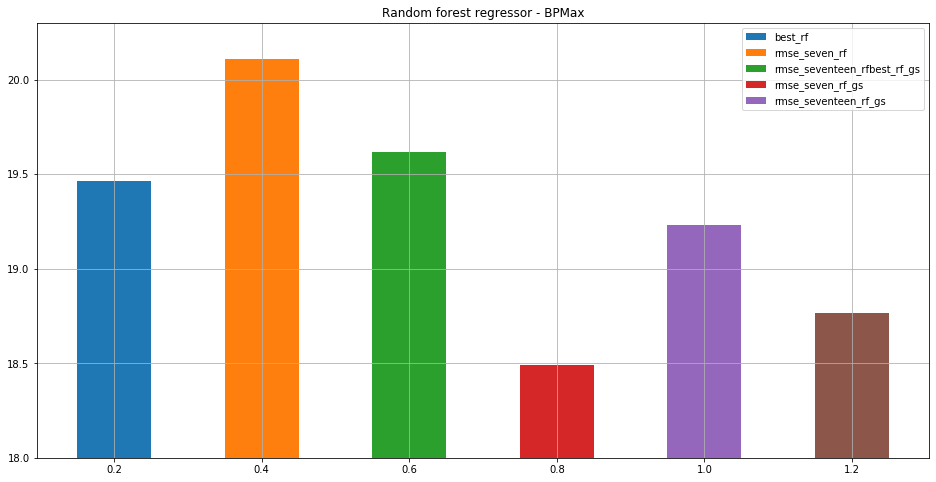

In [74]:
plt.figure(figsize=(16,8))
plt.title("Random forest regressor - BPMax")
plt.bar(0.2,best_rf,width=0.1)
plt.bar(0.4,rmse_seven_rf,width=0.1)
plt.bar(0.6,rmse_seventeen_rf,width=0.1)
plt.bar(0.8,best_rf_gs,width=0.1)
plt.bar(1.0,rmse_seven_rf_gs,width=0.1)
plt.bar(1.2,rmse_seventeen_rf_gs,width=0.1)
plt.legend(['best_rf','rmse_seven_rf','rmse_seventeen_rf''best_rf_gs','rmse_seven_rf_gs','rmse_seventeen_rf_gs'])
plt.ylim(18,20.3)
plt.grid()

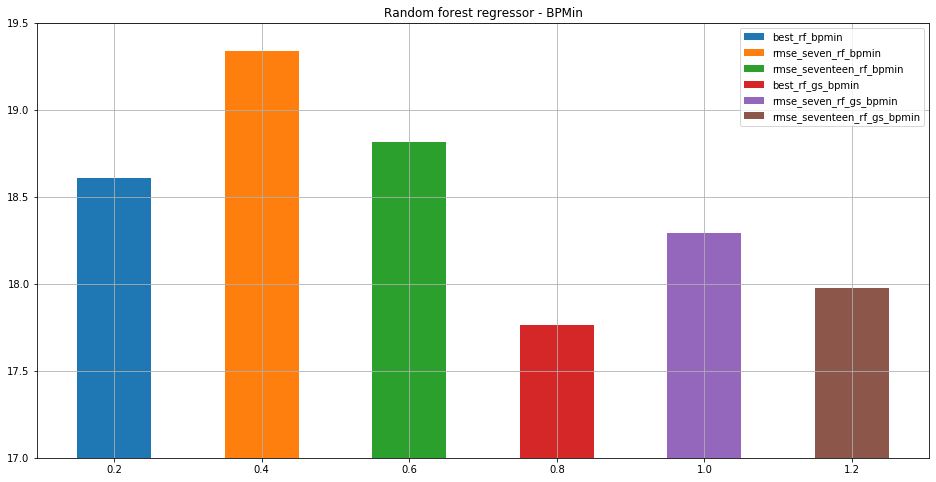

In [96]:
plt.figure(figsize=(16,8))
plt.title("Random forest regressor - BPMin")
plt.bar(0.2,best_rf_bpmin,width=0.1)
plt.bar(0.4,rmse_seven_rf_bpmin,width=0.1)
plt.bar(0.6,rmse_seventeen_rf_bpmin,width=0.1)
plt.bar(0.8,best_rf_gs_bpmin,width=0.1)
plt.bar(1.0,rmse_seven_rf_gs_bpmin,width=0.1)
plt.bar(1.2,rmse_seventeen_rf_gs_bpmin,width=0.1)
plt.legend(['best_rf_bpmin','rmse_seven_rf_bpmin','rmse_seventeen_rf_bpmin','best_rf_gs_bpmin','rmse_seven_rf_gs_bpmin','rmse_seventeen_rf_gs_bpmin'])
plt.ylim(17,19.5)
plt.grid()

### 4) AdaBoost Regressor

In [122]:
model4=AdaBoostRegressor()

In [75]:
rmse_ab,features_ab=rmse(model4,X_train_tf,X_test_tf,y_train,y_test)

    Feature  Scores
0     alpha       6
1       PIR       5
2       ptt      15
3   hrfinal       7
4        ih       1
5        il      11
6       meu       4
7         j       2
8         k      19
9         l       9
10        m      16
11        n      23
12        o      21
13        p      14
14        q      20
15        r      17
16        s      12
17        t       8
18        u       3
19        v      24
20        w      22
21        x      25
22        y      26
23        z      18
24       aa      27
25       ab      13
26       ac      10
Mean Absolute Error: 16.22242164308852
Mean Squared Error: 414.0736628729613
Root Mean Squared Error: 20.34880003520997
Variance score: 0.01
    Feature  Scores
0     alpha       7
1       PIR      11
2       ptt      13
3   hrfinal       2
4        ih       1
5        il       9
6       meu       3
7         j       1
8         k      14
9         l       8
10        m      18
11        n      15
12        o      21
13        p      12

    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       2
20        w       1
21        x       1
22        y       1
23        z       1
24       aa       3
25       ab       1
26       ac       1
Mean Absolute Error: 15.64394489275693
Mean Squared Error: 392.90252765351477
Root Mean Squared Error: 19.821769034410494
Variance score: 0.06


In [123]:
rmse_ab_bpmin,features_ab_bpmin=rmse(model4,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)

    Feature  Scores
0     alpha       4
1       PIR       8
2       ptt       7
3   hrfinal       6
4        ih       9
5        il       1
6       meu       2
7         j      19
8         k      11
9         l       5
10        m      14
11        n      27
12        o      15
13        p      26
14        q      13
15        r      16
16        s      17
17        t      20
18        u      10
19        v      24
20        w      18
21        x      21
22        y      22
23        z      23
24       aa      25
25       ab      12
26       ac       3
Mean Absolute Error: 14.96091089381053
Mean Squared Error: 357.15356535200533
Root Mean Squared Error: 18.898506960921683
Variance score: 0.03
    Feature  Scores
0     alpha       2
1       PIR       5
2       ptt       6
3   hrfinal       4
4        ih      10
5        il       1
6       meu       1
7         j       7
8         k      13
9         l       3
10        m      15
11        n      22
12        o      24
13        p      

Mean Absolute Error: 14.77373682634034
Mean Squared Error: 348.32847931483474
Root Mean Squared Error: 18.663560199351963
Variance score: 0.05
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       2
13        p       1
14        q       1
15        r       1
16        s       1
17        t       3
18        u       1
19        v       1
20        w       1
21        x       1
22        y       1
23        z       1
24       aa       1
25       ab       1
26       ac       1
Mean Absolute Error: 14.767625533353334
Mean Squared Error: 349.5904240537566
Root Mean Squared Error: 18.69733735198027
Variance score: 0.05


In [76]:
best_ab,idx_ab=find_best_model(len(rmse_ab),rmse_ab)

In [124]:
best_ab_bpmin,idx_ab_bpmin=find_best_model(len(rmse_ab_bpmin),rmse_ab_bpmin)

In [77]:
best_ab

19.818137344634113

In [125]:
best_ab_bpmin

18.584721314279626

In [80]:
#Broj na features so koj e dobien najdobar score

ind=idx_ab*2+1
ind="'"+str(ind)+"'"
print(features_ab[ind])

23


In [126]:
#Broj na features so koj e dobien najdobar score

ind=idx_ab_bpmin*2+1
ind="'"+str(ind)+"'"
print(features_ab_bpmin[ind])

17


In [78]:
rmse_seven_ab=model_eval(model4,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)

Mean Absolute Error: 20.026876310258405
Mean Squared Error: 568.4646778377213
Root Mean Squared Error: 23.8424973070717
Variance score: -0.36


In [79]:
rmse_seventeen_ab=model_eval(model4,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

Mean Absolute Error: 18.595552966285833
Mean Squared Error: 498.5466570272621
Root Mean Squared Error: 22.328158388619112
Variance score: -0.19


In [127]:
rmse_seven_ab_bpmin=model_eval(model4,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)

Mean Absolute Error: 14.747185587047497
Mean Squared Error: 347.70552310037306
Root Mean Squared Error: 18.64686362636819
Variance score: 0.06


In [128]:
rmse_seventeen_ab_bpmin=model_eval(model4,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

Mean Absolute Error: 14.690119667015445
Mean Squared Error: 346.3401118557506
Root Mean Squared Error: 18.610215255492093
Variance score: 0.06


In [129]:
params_ab={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}

In [88]:
bp_ab,score_ab=grid_search(model4,params_ab,X_train_tf,y_train)
bp_ab_seven,score_ab_seven=grid_search(model4,params_ab,X_train_seven_tf,y_train)
bp_ab_seventeen,score_ab_seventeen=grid_search(model4,params_ab,X_train_seventeen_tf,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 11.1min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.7min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  7.4min finished


In [130]:
bp_ab_bpmin,score_ab_bpmin=grid_search(model4,params_ab,X_train_bpmin_tf,y_train_bpmin)
bp_ab_seven_bpmin,score_ab_seven_bpmin=grid_search(model4,params_ab,X_train_seven_bpmin_tf,y_train_bpmin)
bp_ab_seventeen_bpmin,score_ab_seventeen_bpmin=grid_search(model4,params_ab,X_train_seventeen_bpmin_tf,y_train_bpmin)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 20.4min finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 11.0min finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 16.5min finished


In [90]:
print(bp_ab)
print(bp_ab_seven)
print(bp_ab_seventeen)

{'learning_rate': 0.001, 'n_estimators': 1000, 'random_state': 1}
{'learning_rate': 0.001, 'n_estimators': 1000, 'random_state': 1}
{'learning_rate': 0.001, 'n_estimators': 500, 'random_state': 1}


In [132]:
print(bp_ab_bpmin)
print(bp_ab_seven_bpmin)
print(bp_ab_seventeen_bpmin)

{'learning_rate': 0.001, 'n_estimators': 2000, 'random_state': 1}
{'learning_rate': 0.001, 'n_estimators': 2000, 'random_state': 1}
{'learning_rate': 0.001, 'n_estimators': 2000, 'random_state': 1}


In [93]:
model4_ab_gs=AdaBoostRegressor(learning_rate=0.001,n_estimators=1000,random_state=1)
model4_seventeen_ab_gs=AdaBoostRegressor(learning_rate=0.001,n_estimators=500,random_state=1)
rmse_ab_gs,features_ab_gs=rmse(model4_ab_gs,X_train_tf,X_test_tf,y_train,y_test)
rmse_seven_ab_gs=model_eval(model4_ab_gs,X_train_seven_tf,X_test_seven_tf,y_train_seven,y_test_seven)
rmse_seventeen_ab_gs=model_eval(model4_seventeen_ab_gs,X_train_seventeen_tf,X_test_seventeen_tf,y_train_seventeen,y_test_seventeen)

    Feature  Scores
0     alpha      13
1       PIR      14
2       ptt      22
3   hrfinal      15
4        ih       2
5        il       6
6       meu      10
7         j       1
8         k      23
9         l      19
10        m      11
11        n      20
12        o      17
13        p       5
14        q      18
15        r       7
16        s       3
17        t       8
18        u       9
19        v      25
20        w      21
21        x      24
22        y      26
23        z      16
24       aa      27
25       ab       4
26       ac      12
Mean Absolute Error: 15.93511861985239
Mean Squared Error: 403.14797159212515
Root Mean Squared Error: 20.078545056655006
Variance score: 0.04
    Feature  Scores
0     alpha      11
1       PIR      12
2       ptt      20
3   hrfinal      13
4        ih       1
5        il       4
6       meu       8
7         j       1
8         k      21
9         l      17
10        m       9
11        n      18
12        o      15
13        p      

Mean Absolute Error: 15.61161133354603
Mean Squared Error: 389.42264967058316
Root Mean Squared Error: 19.733794609009774
Variance score: 0.07
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       1
20        w       1
21        x       1
22        y       2
23        z       1
24       aa       3
25       ab       1
26       ac       1
Mean Absolute Error: 15.612564056326063
Mean Squared Error: 389.4783236988752
Root Mean Squared Error: 19.735205185122226
Variance score: 0.07
Mean Absolute Error: 15.83708207604937
Mean Squared Error: 396.6790674749923
Root Mean Squared Error: 19.91680364604201
Variance score: 0.05
Mean Absolute

In [133]:
model4_ab_gs_bpmin=AdaBoostRegressor(learning_rate=0.001,n_estimators=2000,random_state=1)
rmse_ab_gs_bpmin,features_ab_gs_bpmin=rmse(model4_ab_gs_bpmin,X_train_bpmin_tf,X_test_bpmin_tf,y_train_bpmin,y_test_bpmin)
rmse_seven_ab_gs_bpmin=model_eval(model4_ab_gs_bpmin,X_train_seven_bpmin_tf,X_test_seven_bpmin_tf,y_train_seven_bpmin,y_test_seven_bpmin)
rmse_seventeen_ab_gs_bpmin=model_eval(model4_ab_gs_bpmin,X_train_seventeen_bpmin_tf,X_test_seventeen_bpmin_tf,y_train_seventeen_bpmin,y_test_seventeen_bpmin)

    Feature  Scores
0     alpha       9
1       PIR       3
2       ptt       7
3   hrfinal       5
4        ih       8
5        il       1
6       meu       2
7         j       6
8         k      16
9         l      13
10        m      11
11        n      14
12        o      19
13        p      15
14        q      18
15        r      17
16        s      10
17        t      20
18        u      21
19        v      25
20        w      22
21        x      24
22        y      27
23        z      23
24       aa      26
25       ab      12
26       ac       4
Mean Absolute Error: 14.829787345614557
Mean Squared Error: 354.2485671140646
Root Mean Squared Error: 18.82149215960479
Variance score: 0.04
    Feature  Scores
0     alpha       7
1       PIR       1
2       ptt       5
3   hrfinal       3
4        ih       6
5        il       1
6       meu       1
7         j       4
8         k      14
9         l      11
10        m       9
11        n      12
12        o      17
13        p      1

Mean Absolute Error: 14.542484358888034
Mean Squared Error: 343.4234698820573
Root Mean Squared Error: 18.53168826313613
Variance score: 0.07
    Feature  Scores
0     alpha       1
1       PIR       1
2       ptt       1
3   hrfinal       1
4        ih       1
5        il       1
6       meu       1
7         j       1
8         k       1
9         l       1
10        m       1
11        n       1
12        o       1
13        p       1
14        q       1
15        r       1
16        s       1
17        t       1
18        u       1
19        v       1
20        w       1
21        x       1
22        y       3
23        z       1
24       aa       2
25       ab       1
26       ac       1
Mean Absolute Error: 14.544097624164735
Mean Squared Error: 343.5086927859425
Root Mean Squared Error: 18.53398750366317
Variance score: 0.07
Mean Absolute Error: 14.612645674453393
Mean Squared Error: 346.3896795022961
Root Mean Squared Error: 18.61154694006643
Variance score: 0.06
Mean Absolute 

In [94]:
print(rmse_seven_ab_gs)
print(rmse_seventeen_ab_gs)

19.91680364604201
19.7554533444353


In [134]:
print(rmse_seven_ab_gs_bpmin)
print(rmse_seventeen_ab_gs_bpmin)

18.61154694006643
18.52599673583638


In [95]:
best_ab_gs,idx_ab_gs=find_best_model(len(rmse_ab_gs),rmse_ab_gs)

In [135]:
best_ab_gs_bpmin,idx_ab_gs_bpmin=find_best_model(len(rmse_ab_gs_bpmin),rmse_ab_gs_bpmin)

In [97]:
best_ab_gs

19.73065501288801

In [136]:
best_ab_gs_bpmin

18.529629692958867

In [96]:
#Broj na features so koj e dobien najdobar score
ind=idx_ab_gs*2+1
ind="'"+str(ind)+"'"
print(features_ab_gs[ind])

19


In [137]:
#Broj na features so koj e dobien najdobar score bpmin
ind=idx_ab_gs_bpmin*2+1
ind="'"+str(ind)+"'"
print(features_ab_gs_bpmin[ind])

15


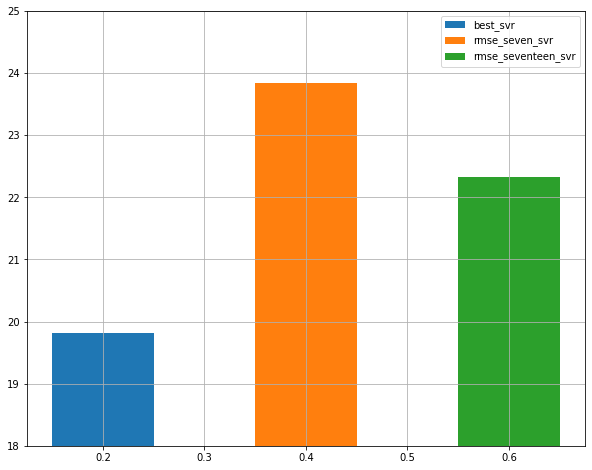

In [84]:
plt.figure(figsize=(16,8))
plt.title('AdaBoost regression - BPMax')
plt.bar(0.2,best_ab,width=0.1)
plt.bar(0.4,rmse_seven_ab,width=0.1)
plt.bar(0.6,rmse_seventeen_ab,width=0.1)
plt.bar(0.8,best_ab_gs,width=0.1)
plt.bar(1.0,rmse_seven_ab_gs,width=0.1)
plt.bar(1.2,rmse_seventeen_ab_gs,width=0.1)
plt.legend(['best_ab','rmse_seven_ab','rmse_seventeen_ab','best_ab_gs','rmse_seven_ab_gs','rmse_seventeen_ab_gs'])
plt.ylim(18,25)
plt.grid()

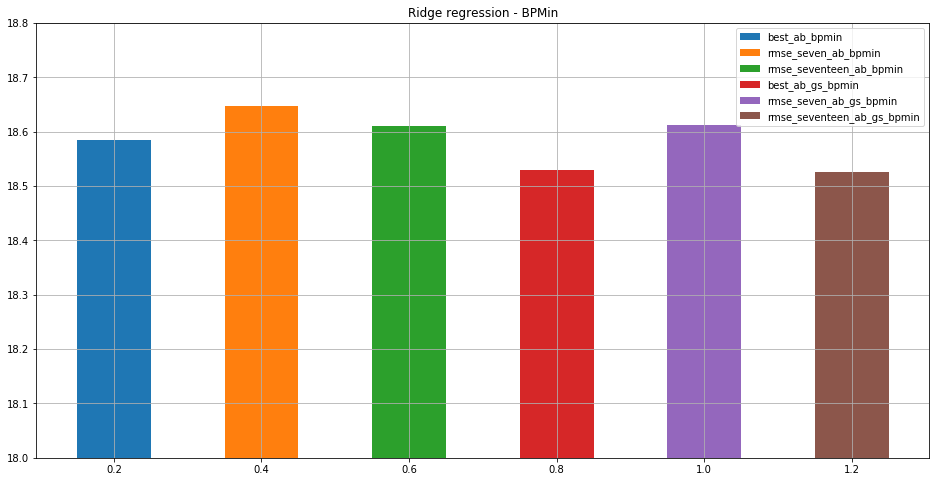

In [141]:
plt.figure(figsize=(16,8))
plt.title('AdaBoost regression - BPMin')
plt.bar(0.2,best_ab_bpmin,width=0.1)
plt.bar(0.4,rmse_seven_ab_bpmin,width=0.1)
plt.bar(0.6,rmse_seventeen_ab_bpmin,width=0.1)
plt.bar(0.8,best_ab_gs_bpmin,width=0.1)
plt.bar(1.0,rmse_seven_ab_gs_bpmin,width=0.1)
plt.bar(1.2,rmse_seventeen_ab_gs_bpmin,width=0.1)
plt.legend(['best_ab_bpmin','rmse_seven_ab_bpmin','rmse_seventeen_ab_bpmin','best_ab_gs_bpmin','rmse_seven_ab_gs_bpmin','rmse_seventeen_ab_gs_bpmin'])
plt.ylim(18,18.8)
plt.grid()

### 5) ANN

In [102]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=27, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# baseline=baseline_model()
estimator = KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=10, verbose=2)
estimator.fit(X_train_tf, y_train)

y_pred_ann = estimator.predict(X_test_tf)


Epoch 1/1000
 - 2s - loss: 3861.4087
Epoch 2/1000
 - 1s - loss: 1002.6155
Epoch 3/1000
 - 1s - loss: 797.0541
Epoch 4/1000
 - 1s - loss: 642.4698
Epoch 5/1000
 - 1s - loss: 538.6983
Epoch 6/1000
 - 1s - loss: 484.7387
Epoch 7/1000
 - 1s - loss: 455.4716
Epoch 8/1000
 - 1s - loss: 438.5017
Epoch 9/1000
 - 1s - loss: 428.4810
Epoch 10/1000
 - 1s - loss: 422.2751
Epoch 11/1000
 - 1s - loss: 419.4340
Epoch 12/1000
 - 1s - loss: 415.7223
Epoch 13/1000
 - 1s - loss: 413.0061
Epoch 14/1000
 - 1s - loss: 411.6754
Epoch 15/1000
 - 1s - loss: 410.6573
Epoch 16/1000
 - 1s - loss: 410.9529
Epoch 17/1000
 - 1s - loss: 407.3362
Epoch 18/1000
 - 1s - loss: 405.9324
Epoch 19/1000
 - 1s - loss: 405.9026
Epoch 20/1000
 - 1s - loss: 405.5528
Epoch 21/1000
 - 1s - loss: 404.8525
Epoch 22/1000
 - 1s - loss: 405.3243
Epoch 23/1000
 - 1s - loss: 404.7838
Epoch 24/1000
 - 1s - loss: 403.1570
Epoch 25/1000
 - 1s - loss: 403.0641
Epoch 26/1000
 - 1s - loss: 402.1772
Epoch 27/1000
 - 1s - loss: 400.7456
Epoch 2

 - 1s - loss: 375.9873
Epoch 215/1000
 - 1s - loss: 374.1566
Epoch 216/1000
 - 1s - loss: 375.3153
Epoch 217/1000
 - 1s - loss: 374.9203
Epoch 218/1000
 - 1s - loss: 375.5758
Epoch 219/1000
 - 1s - loss: 374.9067
Epoch 220/1000
 - 1s - loss: 375.3580
Epoch 221/1000
 - 1s - loss: 374.5417
Epoch 222/1000
 - 1s - loss: 374.3572
Epoch 223/1000
 - 1s - loss: 375.3140
Epoch 224/1000
 - 1s - loss: 374.8538
Epoch 225/1000
 - 1s - loss: 374.0263
Epoch 226/1000
 - 1s - loss: 373.9858
Epoch 227/1000
 - 1s - loss: 374.4726
Epoch 228/1000
 - 1s - loss: 373.5279
Epoch 229/1000
 - 1s - loss: 373.4183
Epoch 230/1000
 - 1s - loss: 373.5462
Epoch 231/1000
 - 1s - loss: 373.5839
Epoch 232/1000
 - 1s - loss: 373.7434
Epoch 233/1000
 - 1s - loss: 373.7778
Epoch 234/1000
 - 1s - loss: 373.2203
Epoch 235/1000
 - 1s - loss: 373.8273
Epoch 236/1000
 - 1s - loss: 373.5771
Epoch 237/1000
 - 1s - loss: 373.2086
Epoch 238/1000
 - 1s - loss: 373.4788
Epoch 239/1000
 - 1s - loss: 372.7202
Epoch 240/1000
 - 1s - loss

Epoch 430/1000
 - 1s - loss: 362.5429
Epoch 431/1000
 - 1s - loss: 361.0752
Epoch 432/1000
 - 1s - loss: 361.6068
Epoch 433/1000
 - 1s - loss: 362.8482
Epoch 434/1000
 - 1s - loss: 360.8738
Epoch 435/1000
 - 1s - loss: 361.6336
Epoch 436/1000
 - 1s - loss: 362.0852
Epoch 437/1000
 - 1s - loss: 358.7278
Epoch 438/1000
 - 1s - loss: 360.3540
Epoch 439/1000
 - 1s - loss: 361.1562
Epoch 440/1000
 - 1s - loss: 363.9152
Epoch 441/1000
 - 1s - loss: 360.6488
Epoch 442/1000
 - 1s - loss: 361.0633
Epoch 443/1000
 - 1s - loss: 361.0556
Epoch 444/1000
 - 1s - loss: 359.9292
Epoch 445/1000
 - 1s - loss: 360.4641
Epoch 446/1000
 - 1s - loss: 361.5505
Epoch 447/1000
 - 1s - loss: 360.5714
Epoch 448/1000
 - 1s - loss: 361.5585
Epoch 449/1000
 - 1s - loss: 360.1999
Epoch 450/1000
 - 1s - loss: 360.1670
Epoch 451/1000
 - 1s - loss: 360.6988
Epoch 452/1000
 - 1s - loss: 361.2459
Epoch 453/1000
 - 1s - loss: 360.9253
Epoch 454/1000
 - 1s - loss: 361.1450
Epoch 455/1000
 - 1s - loss: 361.5984
Epoch 456/10

Epoch 646/1000
 - 1s - loss: 353.8642
Epoch 647/1000
 - 1s - loss: 353.2069
Epoch 648/1000
 - 1s - loss: 354.2681
Epoch 649/1000
 - 1s - loss: 351.9642
Epoch 650/1000
 - 1s - loss: 352.6479
Epoch 651/1000
 - 1s - loss: 353.0385
Epoch 652/1000
 - 1s - loss: 351.2438
Epoch 653/1000
 - 1s - loss: 351.7816
Epoch 654/1000
 - 1s - loss: 352.1864
Epoch 655/1000
 - 1s - loss: 353.4037
Epoch 656/1000
 - 1s - loss: 353.8650
Epoch 657/1000
 - 1s - loss: 351.6746
Epoch 658/1000
 - 1s - loss: 351.0403
Epoch 659/1000
 - 1s - loss: 353.8568
Epoch 660/1000
 - 1s - loss: 352.6533
Epoch 661/1000
 - 1s - loss: 351.1410
Epoch 662/1000
 - 1s - loss: 353.7547
Epoch 663/1000
 - 1s - loss: 351.7941
Epoch 664/1000
 - 1s - loss: 352.4903
Epoch 665/1000
 - 1s - loss: 351.3812
Epoch 666/1000
 - 1s - loss: 353.2105
Epoch 667/1000
 - 1s - loss: 352.3839
Epoch 668/1000
 - 1s - loss: 352.2464
Epoch 669/1000
 - 1s - loss: 352.4581
Epoch 670/1000
 - 1s - loss: 353.2270
Epoch 671/1000
 - 1s - loss: 352.1939
Epoch 672/10

Epoch 862/1000
 - 1s - loss: 347.0645
Epoch 863/1000
 - 1s - loss: 347.2713
Epoch 864/1000
 - 1s - loss: 347.8802
Epoch 865/1000
 - 1s - loss: 346.4482
Epoch 866/1000
 - 1s - loss: 347.1190
Epoch 867/1000
 - 1s - loss: 346.3370
Epoch 868/1000
 - 1s - loss: 346.6763
Epoch 869/1000
 - 1s - loss: 347.0769
Epoch 870/1000
 - 1s - loss: 346.6106
Epoch 871/1000
 - 1s - loss: 345.5294
Epoch 872/1000
 - 1s - loss: 347.0287
Epoch 873/1000
 - 1s - loss: 347.3727
Epoch 874/1000
 - 1s - loss: 347.3033
Epoch 875/1000
 - 1s - loss: 347.2199
Epoch 876/1000
 - 2s - loss: 346.0735
Epoch 877/1000
 - 2s - loss: 347.5741
Epoch 878/1000
 - 1s - loss: 346.8882
Epoch 879/1000
 - 1s - loss: 347.1837
Epoch 880/1000
 - 1s - loss: 345.9177
Epoch 881/1000
 - 1s - loss: 346.3009
Epoch 882/1000
 - 1s - loss: 346.3645
Epoch 883/1000
 - 1s - loss: 347.0582
Epoch 884/1000
 - 1s - loss: 346.5996
Epoch 885/1000
 - 1s - loss: 345.8536
Epoch 886/1000
 - 1s - loss: 347.2910
Epoch 887/1000
 - 1s - loss: 346.9644
Epoch 888/10

In [103]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=27, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# baseline=baseline_model()
estimator_bpmin = KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=10, verbose=2)
estimator_bpmin.fit(X_train_bpmin_tf, y_train_bpmin)

y_pred_ann_bpmin = estimator.predict(X_test_bpmin_tf)

Epoch 1/1000
 - 1s - loss: 1273.1615
Epoch 2/1000
 - 1s - loss: 537.0972
Epoch 3/1000
 - 1s - loss: 468.4118
Epoch 4/1000
 - 1s - loss: 428.7316
Epoch 5/1000
 - 1s - loss: 410.5859
Epoch 6/1000
 - 1s - loss: 400.1528
Epoch 7/1000
 - 1s - loss: 393.8277
Epoch 8/1000
 - 1s - loss: 390.6504
Epoch 9/1000
 - 1s - loss: 388.6493
Epoch 10/1000
 - 1s - loss: 387.2547
Epoch 11/1000
 - 1s - loss: 386.6166
Epoch 12/1000
 - 1s - loss: 385.1170
Epoch 13/1000
 - 1s - loss: 384.8266
Epoch 14/1000
 - 1s - loss: 383.8060
Epoch 15/1000
 - 1s - loss: 383.5169
Epoch 16/1000
 - 1s - loss: 383.2660
Epoch 17/1000
 - 1s - loss: 382.7193
Epoch 18/1000
 - 1s - loss: 382.5228
Epoch 19/1000
 - 1s - loss: 381.6421
Epoch 20/1000
 - 1s - loss: 381.2740
Epoch 21/1000
 - 1s - loss: 381.0194
Epoch 22/1000
 - 1s - loss: 381.0486
Epoch 23/1000
 - 1s - loss: 380.3749
Epoch 24/1000
 - 2s - loss: 379.6686
Epoch 25/1000
 - 1s - loss: 377.7080
Epoch 26/1000
 - 1s - loss: 378.2804
Epoch 27/1000
 - 1s - loss: 377.5520
Epoch 28/

 - 1s - loss: 342.3892
Epoch 220/1000
 - 1s - loss: 341.4043
Epoch 221/1000
 - 1s - loss: 342.2435
Epoch 222/1000
 - 1s - loss: 342.1997
Epoch 223/1000
 - 1s - loss: 342.4159
Epoch 224/1000
 - 1s - loss: 340.6995
Epoch 225/1000
 - 1s - loss: 340.4871
Epoch 226/1000
 - 1s - loss: 341.3075
Epoch 227/1000
 - 1s - loss: 340.7200
Epoch 228/1000
 - 1s - loss: 340.3445
Epoch 229/1000
 - 1s - loss: 342.7838
Epoch 230/1000
 - 1s - loss: 341.2118
Epoch 231/1000
 - 1s - loss: 340.3450
Epoch 232/1000
 - 1s - loss: 340.9001
Epoch 233/1000
 - 1s - loss: 340.5332
Epoch 234/1000
 - 1s - loss: 340.6968
Epoch 235/1000
 - 1s - loss: 341.2950
Epoch 236/1000
 - 1s - loss: 341.0180
Epoch 237/1000
 - 1s - loss: 341.2200
Epoch 238/1000
 - 1s - loss: 340.3081
Epoch 239/1000
 - 1s - loss: 340.1594
Epoch 240/1000
 - 1s - loss: 340.8242
Epoch 241/1000
 - 1s - loss: 341.3399
Epoch 242/1000
 - 1s - loss: 339.9811
Epoch 243/1000
 - 1s - loss: 339.5653
Epoch 244/1000
 - 1s - loss: 341.0026
Epoch 245/1000
 - 1s - loss

Epoch 435/1000
 - 1s - loss: 328.2165
Epoch 436/1000
 - 1s - loss: 328.9990
Epoch 437/1000
 - 1s - loss: 327.9629
Epoch 438/1000
 - 1s - loss: 326.9939
Epoch 439/1000
 - 1s - loss: 328.3174
Epoch 440/1000
 - 1s - loss: 328.7207
Epoch 441/1000
 - 1s - loss: 328.7680
Epoch 442/1000
 - 1s - loss: 328.2196
Epoch 443/1000
 - 1s - loss: 328.9495
Epoch 444/1000
 - 1s - loss: 328.3209
Epoch 445/1000
 - 1s - loss: 328.5562
Epoch 446/1000
 - 1s - loss: 327.9483
Epoch 447/1000
 - 1s - loss: 326.6531
Epoch 448/1000
 - 1s - loss: 327.7139
Epoch 449/1000
 - 1s - loss: 329.1800
Epoch 450/1000
 - 1s - loss: 329.0056
Epoch 451/1000
 - 1s - loss: 328.7830
Epoch 452/1000
 - 1s - loss: 327.5527
Epoch 453/1000
 - 1s - loss: 327.7480
Epoch 454/1000
 - 1s - loss: 328.0131
Epoch 455/1000
 - 1s - loss: 329.0620
Epoch 456/1000
 - 1s - loss: 328.3016
Epoch 457/1000
 - 1s - loss: 328.1691
Epoch 458/1000
 - 1s - loss: 327.6161
Epoch 459/1000
 - 1s - loss: 328.8690
Epoch 460/1000
 - 1s - loss: 327.5294
Epoch 461/10

Epoch 651/1000
 - 1s - loss: 321.5322
Epoch 652/1000
 - 1s - loss: 321.9748
Epoch 653/1000
 - 1s - loss: 320.6430
Epoch 654/1000
 - 1s - loss: 321.8530
Epoch 655/1000
 - 1s - loss: 321.7445
Epoch 656/1000
 - 1s - loss: 322.5022
Epoch 657/1000
 - 1s - loss: 321.9326
Epoch 658/1000
 - 1s - loss: 322.3812
Epoch 659/1000
 - 1s - loss: 321.0033
Epoch 660/1000
 - 1s - loss: 320.6428
Epoch 661/1000
 - 1s - loss: 320.8251
Epoch 662/1000
 - 1s - loss: 323.2110
Epoch 663/1000
 - 1s - loss: 322.1984
Epoch 664/1000
 - 1s - loss: 320.6707
Epoch 665/1000
 - 1s - loss: 320.9698
Epoch 666/1000
 - 1s - loss: 320.4404
Epoch 667/1000
 - 1s - loss: 320.1244
Epoch 668/1000
 - 1s - loss: 320.8506
Epoch 669/1000
 - 1s - loss: 320.4973
Epoch 670/1000
 - 1s - loss: 322.2206
Epoch 671/1000
 - 1s - loss: 319.9834
Epoch 672/1000
 - 1s - loss: 322.2561
Epoch 673/1000
 - 1s - loss: 320.5095
Epoch 674/1000
 - 1s - loss: 320.4247
Epoch 675/1000
 - 1s - loss: 320.6230
Epoch 676/1000
 - 1s - loss: 320.7107
Epoch 677/10

Epoch 867/1000
 - 1s - loss: 314.1429
Epoch 868/1000
 - 1s - loss: 312.9101
Epoch 869/1000
 - 1s - loss: 313.3997
Epoch 870/1000
 - 1s - loss: 312.9337
Epoch 871/1000
 - 1s - loss: 311.7611
Epoch 872/1000
 - 1s - loss: 312.9724
Epoch 873/1000
 - 1s - loss: 313.5335
Epoch 874/1000
 - 1s - loss: 312.8509
Epoch 875/1000
 - 1s - loss: 313.8102
Epoch 876/1000
 - 1s - loss: 311.5990
Epoch 877/1000
 - 1s - loss: 313.3719
Epoch 878/1000
 - 1s - loss: 313.9891
Epoch 879/1000
 - 1s - loss: 313.7085
Epoch 880/1000
 - 1s - loss: 312.9033
Epoch 881/1000
 - 1s - loss: 311.6824
Epoch 882/1000
 - 1s - loss: 311.2336
Epoch 883/1000
 - 1s - loss: 312.6860
Epoch 884/1000
 - 1s - loss: 313.0275
Epoch 885/1000
 - 1s - loss: 313.7688
Epoch 886/1000
 - 1s - loss: 312.9983
Epoch 887/1000
 - 1s - loss: 314.1379
Epoch 888/1000
 - 1s - loss: 313.5166
Epoch 889/1000
 - 1s - loss: 312.4576
Epoch 890/1000
 - 1s - loss: 312.9476
Epoch 891/1000
 - 1s - loss: 314.5305
Epoch 892/1000
 - 1s - loss: 313.7032
Epoch 893/10

In [104]:
# # The mean squared error
rmse_ann=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ann))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ann))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann)))

Mean Absolute Error: 15.65190299477032
Mean Squared Error: 399.45487176863077
Root Mean Squared Error: 19.986367147849325


In [105]:
# # The mean squared error
rmse_ann_bpmin=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann_bpmin))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_bpmin, y_pred_ann_bpmin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_bpmin, y_pred_ann_bpmin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_bpmin, y_pred_ann_bpmin)))

Mean Absolute Error: 49.02083130691064
Mean Squared Error: 2780.6060006066477
Root Mean Squared Error: 52.731451721023646


In [106]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# baseline=baseline_model()
estimator_seven= KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=10, verbose=2)
estimator_seven.fit(X_train_seven_tf, y_train)

y_pred_ann_seven = estimator_seven.predict(X_test_seven_tf)

Epoch 1/1000
 - 1s - loss: 3797.2760
Epoch 2/1000
 - 1s - loss: 473.6936
Epoch 3/1000
 - 1s - loss: 434.5299
Epoch 4/1000
 - 1s - loss: 423.5258
Epoch 5/1000
 - 1s - loss: 420.4589
Epoch 6/1000
 - 1s - loss: 418.1294
Epoch 7/1000
 - 1s - loss: 417.4812
Epoch 8/1000
 - 1s - loss: 415.8632
Epoch 9/1000
 - 1s - loss: 416.6063
Epoch 10/1000
 - 1s - loss: 415.8410
Epoch 11/1000
 - 1s - loss: 414.3523
Epoch 12/1000
 - 1s - loss: 414.9430
Epoch 13/1000
 - 1s - loss: 413.3662
Epoch 14/1000
 - 1s - loss: 413.1908
Epoch 15/1000
 - 1s - loss: 414.5352
Epoch 16/1000
 - 1s - loss: 413.7270
Epoch 17/1000
 - 1s - loss: 412.5270
Epoch 18/1000
 - 1s - loss: 412.8776
Epoch 19/1000
 - 1s - loss: 412.6732
Epoch 20/1000
 - 1s - loss: 411.6686
Epoch 21/1000
 - 1s - loss: 411.8637
Epoch 22/1000
 - 1s - loss: 410.1573
Epoch 23/1000
 - 1s - loss: 411.7953
Epoch 24/1000
 - 1s - loss: 408.7131
Epoch 25/1000
 - 1s - loss: 409.1575
Epoch 26/1000
 - 1s - loss: 408.2605
Epoch 27/1000
 - 1s - loss: 408.4228
Epoch 28/

Epoch 220/1000
 - 1s - loss: 392.0590
Epoch 221/1000
 - 1s - loss: 391.9567
Epoch 222/1000
 - 1s - loss: 393.2378
Epoch 223/1000
 - 1s - loss: 394.0090
Epoch 224/1000
 - 1s - loss: 392.6710
Epoch 225/1000
 - 1s - loss: 392.6543
Epoch 226/1000
 - 1s - loss: 391.9796
Epoch 227/1000
 - 1s - loss: 392.8154
Epoch 228/1000
 - 1s - loss: 391.5188
Epoch 229/1000
 - 1s - loss: 392.8882
Epoch 230/1000
 - 1s - loss: 392.3147
Epoch 231/1000
 - 1s - loss: 391.9947
Epoch 232/1000
 - 1s - loss: 392.5596
Epoch 233/1000
 - 1s - loss: 391.1487
Epoch 234/1000
 - 1s - loss: 392.3956
Epoch 235/1000
 - 1s - loss: 391.8732
Epoch 236/1000
 - 1s - loss: 391.5292
Epoch 237/1000
 - 1s - loss: 391.3681
Epoch 238/1000
 - 1s - loss: 392.6689
Epoch 239/1000
 - 1s - loss: 392.0308
Epoch 240/1000
 - 1s - loss: 391.2704
Epoch 241/1000
 - 1s - loss: 391.6785
Epoch 242/1000
 - 1s - loss: 393.0282
Epoch 243/1000
 - 1s - loss: 391.9172
Epoch 244/1000
 - 1s - loss: 391.7383
Epoch 245/1000
 - 1s - loss: 391.4103
Epoch 246/10

Epoch 436/1000
 - 1s - loss: 388.2885
Epoch 437/1000
 - 1s - loss: 388.3315
Epoch 438/1000
 - 1s - loss: 388.7126
Epoch 439/1000
 - 1s - loss: 389.2037
Epoch 440/1000
 - 1s - loss: 389.0312
Epoch 441/1000
 - 1s - loss: 388.5292
Epoch 442/1000
 - 1s - loss: 389.0381
Epoch 443/1000
 - 1s - loss: 388.4579
Epoch 444/1000
 - 1s - loss: 388.4769
Epoch 445/1000
 - 1s - loss: 387.9895
Epoch 446/1000
 - 1s - loss: 388.3481
Epoch 447/1000
 - 1s - loss: 387.9839
Epoch 448/1000
 - 1s - loss: 388.5889
Epoch 449/1000
 - 1s - loss: 388.6022
Epoch 450/1000
 - 1s - loss: 388.1882
Epoch 451/1000
 - 1s - loss: 387.5185
Epoch 452/1000
 - 1s - loss: 388.2260
Epoch 453/1000
 - 1s - loss: 388.1520
Epoch 454/1000
 - 1s - loss: 388.8602
Epoch 455/1000
 - 1s - loss: 388.5056
Epoch 456/1000
 - 1s - loss: 388.2457
Epoch 457/1000
 - 1s - loss: 388.3330
Epoch 458/1000
 - 1s - loss: 389.0335
Epoch 459/1000
 - 1s - loss: 389.3377
Epoch 460/1000
 - 1s - loss: 389.0308
Epoch 461/1000
 - 1s - loss: 388.4993
Epoch 462/10

Epoch 652/1000
 - 1s - loss: 386.0257
Epoch 653/1000
 - 1s - loss: 386.2193
Epoch 654/1000
 - 1s - loss: 386.5150
Epoch 655/1000
 - 1s - loss: 386.3182
Epoch 656/1000
 - 1s - loss: 386.1181
Epoch 657/1000
 - 1s - loss: 387.1395
Epoch 658/1000
 - 1s - loss: 386.1180
Epoch 659/1000
 - 1s - loss: 385.8954
Epoch 660/1000
 - 1s - loss: 386.7120
Epoch 661/1000
 - 1s - loss: 386.5679
Epoch 662/1000
 - 1s - loss: 386.7343
Epoch 663/1000
 - 1s - loss: 385.1140
Epoch 664/1000
 - 1s - loss: 385.2606
Epoch 665/1000
 - 1s - loss: 386.4903
Epoch 666/1000
 - 1s - loss: 385.3963
Epoch 667/1000
 - 1s - loss: 385.0690
Epoch 668/1000
 - 1s - loss: 386.0856
Epoch 669/1000
 - 1s - loss: 384.9001
Epoch 670/1000
 - 1s - loss: 386.1835
Epoch 671/1000
 - 1s - loss: 386.1676
Epoch 672/1000
 - 1s - loss: 386.7017
Epoch 673/1000
 - 1s - loss: 385.3483
Epoch 674/1000
 - 1s - loss: 385.2765
Epoch 675/1000
 - 1s - loss: 385.5819
Epoch 676/1000
 - 1s - loss: 386.3505
Epoch 677/1000
 - 1s - loss: 384.6842
Epoch 678/10

Epoch 868/1000
 - 1s - loss: 382.5740
Epoch 869/1000
 - 1s - loss: 383.3692
Epoch 870/1000
 - 1s - loss: 381.8977
Epoch 871/1000
 - 1s - loss: 381.8300
Epoch 872/1000
 - 1s - loss: 382.6542
Epoch 873/1000
 - 1s - loss: 382.6282
Epoch 874/1000
 - 1s - loss: 383.0277
Epoch 875/1000
 - 1s - loss: 381.4595
Epoch 876/1000
 - 1s - loss: 382.2269
Epoch 877/1000
 - 1s - loss: 383.1158
Epoch 878/1000
 - 1s - loss: 382.2957
Epoch 879/1000
 - 1s - loss: 382.5304
Epoch 880/1000
 - 1s - loss: 381.3732
Epoch 881/1000
 - 1s - loss: 383.4501
Epoch 882/1000
 - 1s - loss: 382.4381
Epoch 883/1000
 - 1s - loss: 382.6491
Epoch 884/1000
 - 1s - loss: 382.1791
Epoch 885/1000
 - 1s - loss: 382.0308
Epoch 886/1000
 - 1s - loss: 382.4700
Epoch 887/1000
 - 1s - loss: 382.0662
Epoch 888/1000
 - 1s - loss: 382.3656
Epoch 889/1000
 - 1s - loss: 381.7800
Epoch 890/1000
 - 1s - loss: 381.8092
Epoch 891/1000
 - 1s - loss: 382.2854
Epoch 892/1000
 - 1s - loss: 382.2680
Epoch 893/1000
 - 1s - loss: 381.6471
Epoch 894/10

In [107]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# baseline=baseline_model()
estimator_seven_bpmin= KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=10, verbose=2)
estimator_seven_bpmin.fit(X_train_seven_bpmin_tf, y_train_bpmin)

y_pred_ann_seven_bpmin = estimator_seven_bpmin.predict(X_test_seven_bpmin_tf)

Epoch 1/1000
 - 1s - loss: 1382.0195
Epoch 2/1000
 - 1s - loss: 407.9401
Epoch 3/1000
 - 1s - loss: 397.4232
Epoch 4/1000
 - 1s - loss: 393.4945
Epoch 5/1000
 - 1s - loss: 392.0040
Epoch 6/1000
 - 1s - loss: 390.3291
Epoch 7/1000
 - 1s - loss: 389.1476
Epoch 8/1000
 - 1s - loss: 388.5549
Epoch 9/1000
 - 1s - loss: 389.0101
Epoch 10/1000
 - 1s - loss: 388.5810
Epoch 11/1000
 - 1s - loss: 387.5404
Epoch 12/1000
 - 1s - loss: 387.7654
Epoch 13/1000
 - 1s - loss: 387.4461
Epoch 14/1000
 - 1s - loss: 387.3305
Epoch 15/1000
 - 1s - loss: 386.4836
Epoch 16/1000
 - 1s - loss: 386.9842
Epoch 17/1000
 - 1s - loss: 387.2284
Epoch 18/1000
 - 1s - loss: 386.9790
Epoch 19/1000
 - 1s - loss: 386.9555
Epoch 20/1000
 - 1s - loss: 386.5768
Epoch 21/1000
 - 1s - loss: 385.8356
Epoch 22/1000
 - 1s - loss: 386.4283
Epoch 23/1000
 - 1s - loss: 385.9277
Epoch 24/1000
 - 1s - loss: 386.2199
Epoch 25/1000
 - 1s - loss: 385.5008
Epoch 26/1000
 - 1s - loss: 385.3338
Epoch 27/1000
 - 1s - loss: 385.5612
Epoch 28/

Epoch 220/1000
 - 1s - loss: 371.0071
Epoch 221/1000
 - 1s - loss: 370.8763
Epoch 222/1000
 - 1s - loss: 370.9893
Epoch 223/1000
 - 1s - loss: 371.6978
Epoch 224/1000
 - 1s - loss: 371.5428
Epoch 225/1000
 - 1s - loss: 371.9153
Epoch 226/1000
 - 1s - loss: 370.9933
Epoch 227/1000
 - 1s - loss: 370.7843
Epoch 228/1000
 - 1s - loss: 370.9147
Epoch 229/1000
 - 1s - loss: 370.5340
Epoch 230/1000
 - 1s - loss: 370.8375
Epoch 231/1000
 - 1s - loss: 370.1684
Epoch 232/1000
 - 1s - loss: 370.5166
Epoch 233/1000
 - 1s - loss: 371.1024
Epoch 234/1000
 - 1s - loss: 371.1161
Epoch 235/1000
 - 1s - loss: 371.0132
Epoch 236/1000
 - 1s - loss: 370.5225
Epoch 237/1000
 - 1s - loss: 370.6468
Epoch 238/1000
 - 1s - loss: 370.3403
Epoch 239/1000
 - 1s - loss: 370.4762
Epoch 240/1000
 - 1s - loss: 371.0600
Epoch 241/1000
 - 1s - loss: 370.8485
Epoch 242/1000
 - 1s - loss: 370.7779
Epoch 243/1000
 - 1s - loss: 370.5297
Epoch 244/1000
 - 1s - loss: 370.1358
Epoch 245/1000
 - 1s - loss: 370.4972
Epoch 246/10

Epoch 436/1000
 - 1s - loss: 365.8211
Epoch 437/1000
 - 1s - loss: 364.8044
Epoch 438/1000
 - 1s - loss: 364.8098
Epoch 439/1000
 - 1s - loss: 365.0751
Epoch 440/1000
 - 1s - loss: 364.1360
Epoch 441/1000
 - 1s - loss: 365.0091
Epoch 442/1000
 - 1s - loss: 365.2008
Epoch 443/1000
 - 1s - loss: 364.9124
Epoch 444/1000
 - 1s - loss: 364.7946
Epoch 445/1000
 - 1s - loss: 365.1808
Epoch 446/1000
 - 1s - loss: 365.0924
Epoch 447/1000
 - 1s - loss: 365.6879
Epoch 448/1000
 - 1s - loss: 364.8598
Epoch 449/1000
 - 1s - loss: 363.8778
Epoch 450/1000
 - 1s - loss: 364.3970
Epoch 451/1000
 - 1s - loss: 364.0568
Epoch 452/1000
 - 1s - loss: 365.1280
Epoch 453/1000
 - 1s - loss: 364.5286
Epoch 454/1000
 - 1s - loss: 364.5815
Epoch 455/1000
 - 1s - loss: 365.0181
Epoch 456/1000
 - 1s - loss: 364.7800
Epoch 457/1000
 - 1s - loss: 364.6815
Epoch 458/1000
 - 1s - loss: 364.9973
Epoch 459/1000
 - 1s - loss: 364.0544
Epoch 460/1000
 - 1s - loss: 364.6378
Epoch 461/1000
 - 1s - loss: 364.4037
Epoch 462/10

Epoch 652/1000
 - 1s - loss: 362.4328
Epoch 653/1000
 - 1s - loss: 362.5790
Epoch 654/1000
 - 1s - loss: 362.3350
Epoch 655/1000
 - 1s - loss: 362.0375
Epoch 656/1000
 - 1s - loss: 362.5906
Epoch 657/1000
 - 1s - loss: 362.9126
Epoch 658/1000
 - 1s - loss: 362.0597
Epoch 659/1000
 - 1s - loss: 362.5618
Epoch 660/1000
 - 1s - loss: 362.1762
Epoch 661/1000
 - 1s - loss: 361.7805
Epoch 662/1000
 - 1s - loss: 361.5511
Epoch 663/1000
 - 1s - loss: 361.6945
Epoch 664/1000
 - 1s - loss: 362.5474
Epoch 665/1000
 - 1s - loss: 362.4237
Epoch 666/1000
 - 1s - loss: 363.0571
Epoch 667/1000
 - 1s - loss: 362.7743
Epoch 668/1000
 - 1s - loss: 362.3991
Epoch 669/1000
 - 1s - loss: 361.8576
Epoch 670/1000
 - 1s - loss: 362.0706
Epoch 671/1000
 - 1s - loss: 362.2853
Epoch 672/1000
 - 1s - loss: 362.5223
Epoch 673/1000
 - 1s - loss: 361.6883
Epoch 674/1000
 - 1s - loss: 362.0204
Epoch 675/1000
 - 2s - loss: 361.7424
Epoch 676/1000
 - 1s - loss: 361.7999
Epoch 677/1000
 - 1s - loss: 361.9424
Epoch 678/10

Epoch 868/1000
 - 1s - loss: 359.2793
Epoch 869/1000
 - 1s - loss: 359.3576
Epoch 870/1000
 - 1s - loss: 360.1024
Epoch 871/1000
 - 1s - loss: 360.3210
Epoch 872/1000
 - 1s - loss: 359.9552
Epoch 873/1000
 - 1s - loss: 360.5610
Epoch 874/1000
 - 1s - loss: 360.2808
Epoch 875/1000
 - 1s - loss: 360.4938
Epoch 876/1000
 - 1s - loss: 360.3603
Epoch 877/1000
 - 1s - loss: 360.1435
Epoch 878/1000
 - 1s - loss: 359.7932
Epoch 879/1000
 - 1s - loss: 360.0827
Epoch 880/1000
 - 1s - loss: 359.5960
Epoch 881/1000
 - 1s - loss: 359.0996
Epoch 882/1000
 - 1s - loss: 359.6497
Epoch 883/1000
 - 1s - loss: 359.7052
Epoch 884/1000
 - 1s - loss: 359.6048
Epoch 885/1000
 - 1s - loss: 360.3323
Epoch 886/1000
 - 1s - loss: 359.0966
Epoch 887/1000
 - 1s - loss: 359.6125
Epoch 888/1000
 - 1s - loss: 359.6395
Epoch 889/1000
 - 1s - loss: 359.7981
Epoch 890/1000
 - 1s - loss: 359.7897
Epoch 891/1000
 - 1s - loss: 359.1956
Epoch 892/1000
 - 1s - loss: 359.3181
Epoch 893/1000
 - 1s - loss: 360.0557
Epoch 894/10

In [108]:
# # The mean squared error
rmse_seven_ann=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann_seven))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ann_seven))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ann_seven))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann_seven)))

Mean Absolute Error: 15.348865021360384
Mean Squared Error: 382.5812869361694
Root Mean Squared Error: 19.559685246347126


In [109]:
# # The mean squared error
rmse_seven_ann_bpmin=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann_seven_bpmin))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_bpmin, y_pred_ann_seven_bpmin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_bpmin, y_pred_ann_seven_bpmin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_bpmin, y_pred_ann_seven_bpmin)))

Mean Absolute Error: 14.625376825239375
Mean Squared Error: 345.94323971786486
Root Mean Squared Error: 18.599549449324435


In [110]:
def baseline_model():
    model = Sequential()
    model.add(Dense(30, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# baseline=baseline_model()
estimator_seventeen = KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=10, verbose=2)
estimator_seventeen.fit(X_train_seventeen_tf, y_train)

y_pred_seventeen_ann_seventeen = estimator_seventeen.predict(X_test_seventeen_tf)

Epoch 1/1000
 - 2s - loss: 3486.9121
Epoch 2/1000
 - 1s - loss: 592.6320
Epoch 3/1000
 - 1s - loss: 449.3267
Epoch 4/1000
 - 1s - loss: 424.4345
Epoch 5/1000
 - 1s - loss: 419.2371
Epoch 6/1000
 - 1s - loss: 411.7632
Epoch 7/1000
 - 1s - loss: 413.4729
Epoch 8/1000
 - 1s - loss: 412.3630
Epoch 9/1000
 - 1s - loss: 411.1997
Epoch 10/1000
 - 1s - loss: 409.8895
Epoch 11/1000
 - 1s - loss: 409.6080
Epoch 12/1000
 - 1s - loss: 408.2974
Epoch 13/1000
 - 1s - loss: 406.8333
Epoch 14/1000
 - 1s - loss: 408.0928
Epoch 15/1000
 - 1s - loss: 406.3761
Epoch 16/1000
 - 1s - loss: 405.4858
Epoch 17/1000
 - 1s - loss: 406.4876
Epoch 18/1000
 - 1s - loss: 406.1388
Epoch 19/1000
 - 1s - loss: 406.1815
Epoch 20/1000
 - 1s - loss: 403.9548
Epoch 21/1000
 - 1s - loss: 403.6133
Epoch 22/1000
 - 1s - loss: 403.0126
Epoch 23/1000
 - 1s - loss: 405.4330
Epoch 24/1000
 - 1s - loss: 403.3408
Epoch 25/1000
 - 1s - loss: 402.3214
Epoch 26/1000
 - 1s - loss: 404.6657
Epoch 27/1000
 - 1s - loss: 401.2618
Epoch 28/

Epoch 220/1000
 - 1s - loss: 367.8913
Epoch 221/1000
 - 1s - loss: 366.7091
Epoch 222/1000
 - 1s - loss: 368.1792
Epoch 223/1000
 - 1s - loss: 366.7176
Epoch 224/1000
 - 1s - loss: 367.9085
Epoch 225/1000
 - 1s - loss: 365.6592
Epoch 226/1000
 - 1s - loss: 365.6956
Epoch 227/1000
 - 1s - loss: 366.9983
Epoch 228/1000
 - 1s - loss: 366.1615
Epoch 229/1000
 - 1s - loss: 366.6945
Epoch 230/1000
 - 1s - loss: 366.0200
Epoch 231/1000
 - 1s - loss: 366.3521
Epoch 232/1000
 - 2s - loss: 365.0669
Epoch 233/1000
 - 1s - loss: 366.1661
Epoch 234/1000
 - 1s - loss: 365.9883
Epoch 235/1000
 - 1s - loss: 364.5240
Epoch 236/1000
 - 2s - loss: 364.5397
Epoch 237/1000
 - 1s - loss: 364.3278
Epoch 238/1000
 - 1s - loss: 364.8885
Epoch 239/1000
 - 1s - loss: 364.1683
Epoch 240/1000
 - 1s - loss: 362.7358
Epoch 241/1000
 - 1s - loss: 364.0129
Epoch 242/1000
 - 1s - loss: 363.9230
Epoch 243/1000
 - 1s - loss: 364.6858
Epoch 244/1000
 - 1s - loss: 363.6760
Epoch 245/1000
 - 1s - loss: 362.1502
Epoch 246/10

Epoch 436/1000
 - 1s - loss: 345.2305
Epoch 437/1000
 - 1s - loss: 345.5304
Epoch 438/1000
 - 1s - loss: 345.2586
Epoch 439/1000
 - 1s - loss: 345.9476
Epoch 440/1000
 - 1s - loss: 344.7966
Epoch 441/1000
 - 1s - loss: 345.5798
Epoch 442/1000
 - 1s - loss: 344.2596
Epoch 443/1000
 - 1s - loss: 343.4907
Epoch 444/1000
 - 1s - loss: 343.9712
Epoch 445/1000
 - 1s - loss: 345.2149
Epoch 446/1000
 - 1s - loss: 345.3332
Epoch 447/1000
 - 1s - loss: 345.2263
Epoch 448/1000
 - 1s - loss: 346.1090
Epoch 449/1000
 - 1s - loss: 343.8598
Epoch 450/1000
 - 1s - loss: 343.8776
Epoch 451/1000
 - 1s - loss: 345.3783
Epoch 452/1000
 - 1s - loss: 343.7161
Epoch 453/1000
 - 1s - loss: 343.9358
Epoch 454/1000
 - 1s - loss: 344.5382
Epoch 455/1000
 - 1s - loss: 345.3114
Epoch 456/1000
 - 1s - loss: 344.4530
Epoch 457/1000
 - 1s - loss: 344.4274
Epoch 458/1000
 - 1s - loss: 343.2353
Epoch 459/1000
 - 1s - loss: 343.5492
Epoch 460/1000
 - 1s - loss: 344.0041
Epoch 461/1000
 - 1s - loss: 343.3381
Epoch 462/10

Epoch 652/1000
 - 1s - loss: 334.4176
Epoch 653/1000
 - 1s - loss: 336.0046
Epoch 654/1000
 - 1s - loss: 335.5864
Epoch 655/1000
 - 1s - loss: 335.0724
Epoch 656/1000
 - 1s - loss: 335.0293
Epoch 657/1000
 - 1s - loss: 335.9502
Epoch 658/1000
 - 1s - loss: 336.4298
Epoch 659/1000
 - 1s - loss: 334.9082
Epoch 660/1000
 - 1s - loss: 334.5116
Epoch 661/1000
 - 1s - loss: 334.5689
Epoch 662/1000
 - 1s - loss: 334.7509
Epoch 663/1000
 - 1s - loss: 335.4977
Epoch 664/1000
 - 1s - loss: 335.0071
Epoch 665/1000
 - 1s - loss: 335.3896
Epoch 666/1000
 - 1s - loss: 335.4837
Epoch 667/1000
 - 1s - loss: 335.6625
Epoch 668/1000
 - 1s - loss: 335.5823
Epoch 669/1000
 - 1s - loss: 335.6281
Epoch 670/1000
 - 1s - loss: 333.6068
Epoch 671/1000
 - 1s - loss: 336.2636
Epoch 672/1000
 - 1s - loss: 334.8524
Epoch 673/1000
 - 1s - loss: 334.1138
Epoch 674/1000
 - 1s - loss: 335.5815
Epoch 675/1000
 - 1s - loss: 333.1932
Epoch 676/1000
 - 1s - loss: 333.3454
Epoch 677/1000
 - 1s - loss: 334.1501
Epoch 678/10

Epoch 868/1000
 - 1s - loss: 324.0318
Epoch 869/1000
 - 1s - loss: 325.6227
Epoch 870/1000
 - 1s - loss: 322.8741
Epoch 871/1000
 - 1s - loss: 323.8166
Epoch 872/1000
 - 1s - loss: 323.7151
Epoch 873/1000
 - 1s - loss: 325.1452
Epoch 874/1000
 - 1s - loss: 325.9755
Epoch 875/1000
 - 1s - loss: 324.4703
Epoch 876/1000
 - 1s - loss: 323.5717
Epoch 877/1000
 - 1s - loss: 323.8884
Epoch 878/1000
 - 1s - loss: 323.6874
Epoch 879/1000
 - 1s - loss: 323.4021
Epoch 880/1000
 - 1s - loss: 323.4433
Epoch 881/1000
 - 1s - loss: 323.1289
Epoch 882/1000
 - 1s - loss: 324.5548
Epoch 883/1000
 - 1s - loss: 323.4300
Epoch 884/1000
 - 1s - loss: 323.8523
Epoch 885/1000
 - 1s - loss: 324.1101
Epoch 886/1000
 - 1s - loss: 324.5429
Epoch 887/1000
 - 1s - loss: 323.8909
Epoch 888/1000
 - 1s - loss: 325.0836
Epoch 889/1000
 - 1s - loss: 323.5558
Epoch 890/1000
 - 1s - loss: 324.2838
Epoch 891/1000
 - 1s - loss: 324.3938
Epoch 892/1000
 - 1s - loss: 325.4073
Epoch 893/1000
 - 1s - loss: 323.1999
Epoch 894/10

In [111]:
def baseline_model():
    model = Sequential()
    model.add(Dense(30, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# baseline=baseline_model()
estimator_seventeen_bpmin= KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=10, verbose=2)
estimator_seventeen_bpmin.fit(X_train_seventeen_bpmin_tf, y_train_bpmin)

y_pred_seventeen_ann_bpmin = estimator_seventeen_bpmin.predict(X_test_seventeen_bpmin_tf)

Epoch 1/1000
 - 2s - loss: 1175.7716
Epoch 2/1000
 - 1s - loss: 429.5341
Epoch 3/1000
 - 1s - loss: 400.8512
Epoch 4/1000
 - 1s - loss: 392.8004
Epoch 5/1000
 - 1s - loss: 390.1491
Epoch 6/1000
 - 1s - loss: 388.6796
Epoch 7/1000
 - 1s - loss: 387.2124
Epoch 8/1000
 - 1s - loss: 385.7795
Epoch 9/1000
 - 1s - loss: 385.5633
Epoch 10/1000
 - 1s - loss: 385.0585
Epoch 11/1000
 - 1s - loss: 385.0159
Epoch 12/1000
 - 1s - loss: 384.0271
Epoch 13/1000
 - 1s - loss: 384.2337
Epoch 14/1000
 - 1s - loss: 385.1044
Epoch 15/1000
 - 1s - loss: 384.0387
Epoch 16/1000
 - 1s - loss: 383.5002
Epoch 17/1000
 - 1s - loss: 383.1977
Epoch 18/1000
 - 1s - loss: 382.0492
Epoch 19/1000
 - 1s - loss: 381.9708
Epoch 20/1000
 - 1s - loss: 381.0390
Epoch 21/1000
 - 1s - loss: 380.8392
Epoch 22/1000
 - 1s - loss: 379.4191
Epoch 23/1000
 - 1s - loss: 378.6542
Epoch 24/1000
 - 1s - loss: 378.4906
Epoch 25/1000
 - 1s - loss: 377.5548
Epoch 26/1000
 - 1s - loss: 377.8134
Epoch 27/1000
 - 1s - loss: 376.8814
Epoch 28/

Epoch 220/1000
 - 1s - loss: 341.7399
Epoch 221/1000
 - 1s - loss: 342.5865
Epoch 222/1000
 - 1s - loss: 340.0321
Epoch 223/1000
 - 1s - loss: 340.9434
Epoch 224/1000
 - 1s - loss: 341.2148
Epoch 225/1000
 - 1s - loss: 340.2563
Epoch 226/1000
 - 1s - loss: 340.6685
Epoch 227/1000
 - 1s - loss: 339.7547
Epoch 228/1000
 - 1s - loss: 340.8758
Epoch 229/1000
 - 1s - loss: 341.2827
Epoch 230/1000
 - 1s - loss: 340.3236
Epoch 231/1000
 - 1s - loss: 341.5338
Epoch 232/1000
 - 1s - loss: 340.6073
Epoch 233/1000
 - 1s - loss: 340.4624
Epoch 234/1000
 - 1s - loss: 339.6695
Epoch 235/1000
 - 1s - loss: 340.2568
Epoch 236/1000
 - 1s - loss: 339.2438
Epoch 237/1000
 - 1s - loss: 339.2196
Epoch 238/1000
 - 1s - loss: 340.9389
Epoch 239/1000
 - 1s - loss: 339.4945
Epoch 240/1000
 - 1s - loss: 340.2434
Epoch 241/1000
 - 1s - loss: 339.5013
Epoch 242/1000
 - 1s - loss: 338.6253
Epoch 243/1000
 - 1s - loss: 339.0140
Epoch 244/1000
 - 1s - loss: 338.7456
Epoch 245/1000
 - 1s - loss: 339.9420
Epoch 246/10

Epoch 436/1000
 - 1s - loss: 324.0159
Epoch 437/1000
 - 1s - loss: 324.0305
Epoch 438/1000
 - 1s - loss: 324.1214
Epoch 439/1000
 - 1s - loss: 324.8378
Epoch 440/1000
 - 1s - loss: 322.8681
Epoch 441/1000
 - 1s - loss: 325.5233
Epoch 442/1000
 - 1s - loss: 324.8527
Epoch 443/1000
 - 1s - loss: 324.1204
Epoch 444/1000
 - 1s - loss: 324.3979
Epoch 445/1000
 - 1s - loss: 323.4237
Epoch 446/1000
 - 1s - loss: 324.1995
Epoch 447/1000
 - 1s - loss: 322.7699
Epoch 448/1000
 - 1s - loss: 325.2383
Epoch 449/1000
 - 1s - loss: 322.7920
Epoch 450/1000
 - 1s - loss: 322.6315
Epoch 451/1000
 - 1s - loss: 323.5946
Epoch 452/1000
 - 1s - loss: 323.0022
Epoch 453/1000
 - 1s - loss: 322.8059
Epoch 454/1000
 - 1s - loss: 322.9119
Epoch 455/1000
 - 1s - loss: 322.6971
Epoch 456/1000
 - 1s - loss: 322.7667
Epoch 457/1000
 - 1s - loss: 323.7442
Epoch 458/1000
 - 1s - loss: 322.9874
Epoch 459/1000
 - 1s - loss: 323.6434
Epoch 460/1000
 - 1s - loss: 322.2574
Epoch 461/1000
 - 1s - loss: 322.0875
Epoch 462/10

Epoch 652/1000
 - 1s - loss: 309.3553
Epoch 653/1000
 - 1s - loss: 308.8147
Epoch 654/1000
 - 1s - loss: 308.3575
Epoch 655/1000
 - 1s - loss: 309.0180
Epoch 656/1000
 - 2s - loss: 308.9089
Epoch 657/1000
 - 1s - loss: 309.7594
Epoch 658/1000
 - 2s - loss: 309.8037
Epoch 659/1000
 - 2s - loss: 308.0844
Epoch 660/1000
 - 1s - loss: 307.8543
Epoch 661/1000
 - 1s - loss: 308.7119
Epoch 662/1000
 - 1s - loss: 310.4812
Epoch 663/1000
 - 1s - loss: 309.2683
Epoch 664/1000
 - 1s - loss: 307.7453
Epoch 665/1000
 - 1s - loss: 308.4808
Epoch 666/1000
 - 1s - loss: 308.7192
Epoch 667/1000
 - 1s - loss: 308.9261
Epoch 668/1000
 - 1s - loss: 308.6331
Epoch 669/1000
 - 1s - loss: 309.2132
Epoch 670/1000
 - 1s - loss: 307.9339
Epoch 671/1000
 - 1s - loss: 308.1921
Epoch 672/1000
 - 1s - loss: 308.6415
Epoch 673/1000
 - 1s - loss: 307.0090
Epoch 674/1000
 - 1s - loss: 307.7750
Epoch 675/1000
 - 1s - loss: 308.1647
Epoch 676/1000
 - 1s - loss: 308.3186
Epoch 677/1000
 - 1s - loss: 306.9746
Epoch 678/10

Epoch 868/1000
 - 2s - loss: 315.5627
Epoch 869/1000
 - 1s - loss: 302.8902
Epoch 870/1000
 - 1s - loss: 297.4111
Epoch 871/1000
 - 1s - loss: 296.8119
Epoch 872/1000
 - 1s - loss: 297.1472
Epoch 873/1000
 - 1s - loss: 297.6869
Epoch 874/1000
 - 1s - loss: 297.8722
Epoch 875/1000
 - 1s - loss: 296.8605
Epoch 876/1000
 - 1s - loss: 298.1706
Epoch 877/1000
 - 2s - loss: 297.6776
Epoch 878/1000
 - 2s - loss: 298.8830
Epoch 879/1000
 - 2s - loss: 297.3880
Epoch 880/1000
 - 1s - loss: 312.9627
Epoch 881/1000
 - 1s - loss: 301.0896
Epoch 882/1000
 - 1s - loss: 296.9160
Epoch 883/1000
 - 1s - loss: 296.3793
Epoch 884/1000
 - 1s - loss: 296.0445
Epoch 885/1000
 - 1s - loss: 297.8185
Epoch 886/1000
 - 1s - loss: 296.8333
Epoch 887/1000
 - 1s - loss: 297.8387
Epoch 888/1000
 - 1s - loss: 298.0121
Epoch 889/1000
 - 1s - loss: 298.4143
Epoch 890/1000
 - 1s - loss: 297.8919
Epoch 891/1000
 - 1s - loss: 298.4443
Epoch 892/1000
 - 1s - loss: 297.7029
Epoch 893/1000
 - 1s - loss: 296.6187
Epoch 894/10

In [114]:
# # The mean squared error
rmse_seventeen_ann=np.sqrt(metrics.mean_squared_error(y_test, y_pred_seventeen_ann_seventeen))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_seventeen_ann_seventeen))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_seventeen_ann_seventeen))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_seventeen_ann_seventeen)))

Mean Absolute Error: 15.750019551520332
Mean Squared Error: 411.89565484225767
Root Mean Squared Error: 20.295212608944446


In [115]:
# # The mean squared error
rmse_seventeen_ann_bpmin=np.sqrt(metrics.mean_squared_error(y_test, y_pred_seventeen_ann_bpmin))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_seventeen_ann_bpmin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_seventeen_ann_bpmin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_seventeen_ann_bpmin)))

Mean Absolute Error: 50.65127118350026
Mean Squared Error: 3050.804792090574
Root Mean Squared Error: 55.23409085058407


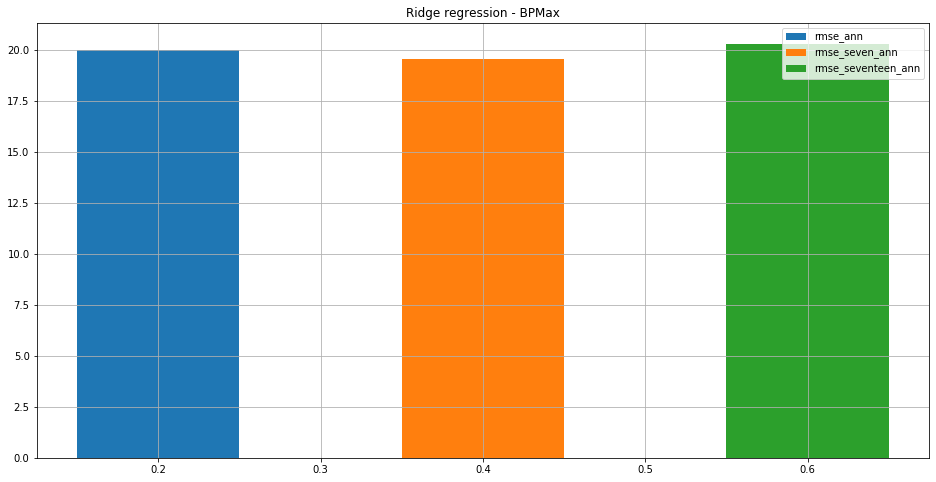

In [118]:
plt.figure(figsize=(16,8))
plt.title('Ridge regression - BPMax')
plt.bar(0.2,rmse_ann,width=0.1)
plt.bar(0.4,rmse_seven_ann,width=0.1)
plt.bar(0.6,rmse_seventeen_ann,width=0.1)
plt.legend(['rmse_ann','rmse_seven_ann','rmse_seventeen_ann'])
# plt.ylim(18,19.5)
plt.grid()

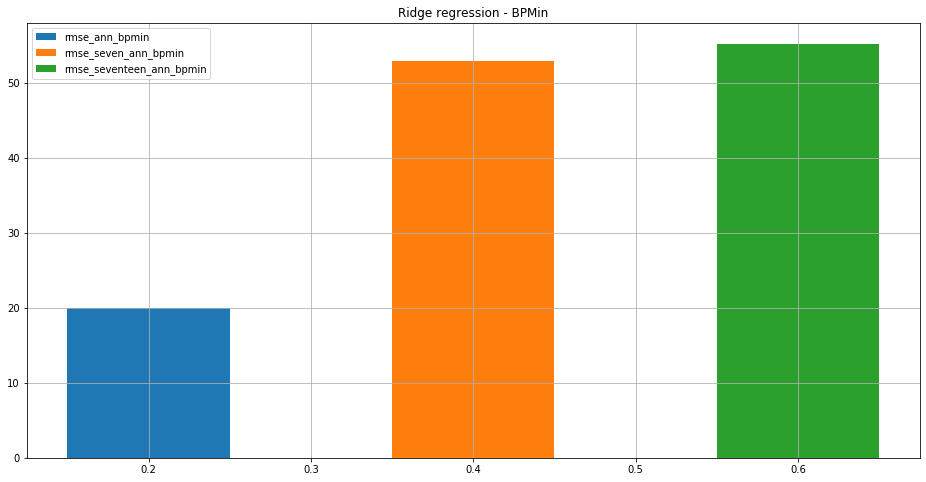

In [120]:
plt.figure(figsize=(16,8))
plt.title('Ridge regression - BPMin')
plt.bar(0.2,rmse_ann_bpmin,width=0.1)
plt.bar(0.4,rmse_seven_ann_bpmin,width=0.1)
plt.bar(0.6,rmse_seventeen_ann_bpmin,width=0.1)
plt.legend(['rmse_ann_bpmin','rmse_seven_ann_bpmin','rmse_seventeen_ann_bpmin'])
# plt.ylim(18,19.5)
plt.grid()